<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных." data-toc-modified-id="Шаг-1.-Обзор-данных.-1">Шаг 1. Обзор данных.</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных." data-toc-modified-id="Шаг-2.-Предобработка-данных.-2">Шаг 2. Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Шаг-2.1.-Проверка-значений-на-аномалии-и-заполнение-пропусков-в-данных." data-toc-modified-id="Шаг-2.1.-Проверка-значений-на-аномалии-и-заполнение-пропусков-в-данных.-2.1">Шаг 2.1. Проверка значений на аномалии и заполнение пропусков в данных.</a></span></li><li><span><a href="#Шаг-2.2.-Проверка-данных-на-дубликаты." data-toc-modified-id="Шаг-2.2.-Проверка-данных-на-дубликаты.-2.2">Шаг 2.2. Проверка данных на дубликаты.</a></span></li></ul></li><li><span><a href="#Шаг-3.--Подсчет-и-добавление-параметров-в-таблицу." data-toc-modified-id="Шаг-3.--Подсчет-и-добавление-параметров-в-таблицу.-3">Шаг 3.  Подсчет и добавление параметров в таблицу.</a></span></li><li><span><a href="#Шаг-4.-Исследовательский-анализ-данных." data-toc-modified-id="Шаг-4.-Исследовательский-анализ-данных.-4">Шаг 4. Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Шаг-4.1.-Исследование-основных-параметров-по-общей-базе-данных." data-toc-modified-id="Шаг-4.1.-Исследование-основных-параметров-по-общей-базе-данных.-4.1">Шаг 4.1. Исследование основных параметров по общей базе данных.</a></span></li><li><span><a href="#Шаг-4.2.-Исследование-влияния-параметров-на-цену-квартиры." data-toc-modified-id="Шаг-4.2.-Исследование-влияния-параметров-на-цену-квартиры.-4.2">Шаг 4.2. Исследование влияния параметров на цену квартиры.</a></span></li><li><span><a href="#Шаг-4.3.-Анализ-цены-квартир-по-населенным-пунктам." data-toc-modified-id="Шаг-4.3.-Анализ-цены-квартир-по-населенным-пунктам.-4.3">Шаг 4.3. Анализ цены квартир по населенным пунктам.</a></span></li><li><span><a href="#Шаг-4.4.-Анализ-влияния-параметров-на-цену-в-Санкт-Петербурге." data-toc-modified-id="Шаг-4.4.-Анализ-влияния-параметров-на-цену-в-Санкт-Петербурге.-4.4">Шаг 4.4. Анализ влияния параметров на цену в Санкт-Петербурге.</a></span></li></ul></li><li><span><a href="#Шаг-5.--Итоги-исследования." data-toc-modified-id="Шаг-5.--Итоги-исследования.-5">Шаг 5.  Итоги исследования.</a></span><ul class="toc-item"><li><span><a href="#Шаг-5.1.-Описание-хода-исследования." data-toc-modified-id="Шаг-5.1.-Описание-хода-исследования.-5.1">Шаг 5.1. Описание хода исследования.</a></span></li><li><span><a href="#Шаг-5.-2.-Общий-вывод." data-toc-modified-id="Шаг-5.-2.-Общий-вывод.-5.2">Шаг 5. 2. Общий вывод.</a></span></li></ul></li></ul></div>

# Определение параметров рыночной стоимости недвижимости.

**По данным базы по продаже квартир в Санкт-Петербурге и Ленинградской области за несколько лет, необходимо научиться определять рыночную стоимость недвижимости. Задача - установить основные параметры, которые влияют на цену недвижимости в регионе, что позволит построить автоматизированную систему, которая будет отслеживать аномалии и возможные мошенничейские действия с продажей квартир. В базе имеются два вида данных: картографические, которые заносились автоматически, а также данные, которые вносились пользователями в ручную.** 

## Шаг 1. Обзор данных.

In [1]:
# импорт основных библиотек и чтение файла с применением конструкции try - except
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('/Users/regki/Downloads/real_estate_data.csv' , sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv' , sep='\t')

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
# обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**В таблице 23699 строк с данными, 22 столбца, из них 14 с показателями в вещественном формате, 3 в целочисленном, 3 в строковом, а также 2 колонки в логическом. В данных видны пропуски, которые распределены в основном неравномерно, особенно много в данных, полученных автоматизированной системой позиционирования. Дальше займемся заполнением этих пропусков и попытаемся объяснить их причину.**

## Шаг 2. Предобработка данных.

### Шаг 2.1. Проверка значений на аномалии и заполнение пропусков в данных.

**Выясним какие пропуски в данных можно заполнить, а какие следует оставить без изменений, чтобы не искажать дальнейший ход исследования. А также исследуем эти данные на аномальные значения.** 

In [4]:
# обзор данных по количеству балконов
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

В данных по количеству балконов максимальное их значение достигает пяти, при том, что количество таких значений довольно большое, около 300. Возможно здесь была допущена ошибка при занесении в базу пользователем. Разумным казалось бы их количество до 3. Менять данные здесь не будем, возможно уточнение у менеджера, котрый предоставлял базу. 

In [5]:
# определение количества в пропусках данных по балконам
df['balcony'].isna().sum()

11519

В данных по балконам пропущено около половины данных, заполним их цифрой "0", так как скорее всего балконов нет. Но брать количество балконов за параметр, влияющий на цену не будем, так как доля пропусков велика, есть аномальные значения, которые следует уточнить.

In [6]:
# заполнение пропусков в данных по балконам цифрой 0
df['balcony'] = df['balcony'].fillna(0)

In [7]:
# проверка пропусков в данных по балконам
df['balcony'].isna().sum()

0

Поменяем формат количества балконов в целочисленный.

In [8]:
# приведение данных в столбце в целочисленный формат
df['balcony'] = df['balcony'].astype('int')

Проверим долю пропусков в данных по общему количеству этажей в здании.

In [9]:
# определение доли пропусков данных по общему количеству этажей
print('Доля пропусков данных по общему кол-ву этажей: {:.2%}'.format(df['floors_total'].isna().sum()/23699))

Доля пропусков данных по общему кол-ву этажей: 0.36%


Доля пропусков в данных по количеству этажей в здании очень низкая. Средним показателем или медианой по выборке, также как и нулями заполнить нелогично. Остается, либо уточнять данные у менеджера, либо не заполнять. Но в этой категории легче ориентироваться, если данные будут в целочисленном формате. Так как в данных по этажу в квартире нет пропусков,  заполним этими данными пропуски в данных по этажу в здании(при том что низкая доля пропусков не должна исказить ход исследования). 

In [ ]:
# заполнение пропусков в данных по этажу в здании значениями этажей квартиры
df['floors_total'] = df['floors_total'].fillna(df['floor'])

In [11]:
# проверка количества пропусков
df['floors_total'].isna().sum()

0

In [12]:
# замена вещественного формата данных общего количества этажей в здании на целочисленный
df['floors_total'] = df['floors_total'].astype('int')

In [13]:
# обзор верхних строк таблицы 
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:
# проверка уникальных значений в булевых данных по апартаментам 
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Пропусков в данных по апартаментам очень много, заполнено лишь 2775 значений из 23699. Это очень много, поэтому их либо надо уточнять у менеджера, либо оставить как есть.

In [15]:
# проверка уникальных значений в данных по количеству комнат
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

В данных по комнатам присутствуют квартиры с аномально большим их числом. Выделим категории с аномально большим количеством, строки с которыми единичны, допустим больше 10 и удалим их. Так как строк всего 8, это не должно исказить исследование, но облегчит понимание закономерностей в распределении.

In [16]:
# удаление строк с аномально большими значениями комнат в квартире
df = df.drop(df[df['rooms'] > 10].index).reset_index(drop=True)

In [17]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
Name: rooms, dtype: int64

В строках по типу квартир - "студия" есть строки с количеством комнат  - 1. Посчитаем их количество. 

In [18]:
# определение количества квартир-студий с числом комнат 1
print('Количество "студий" с 1 комнатой:' , df[(df['studio'] == True) & (df['rooms'] == 1)]['rooms'].count())

Количество "студий" с 1 комнатой: 11


Количество "студий" с 1 комнатой минимально, можно их заменить на 0, учитывая приоритет столбца с булевым значением.

In [19]:
# замена количества комнат в квартирах-студиях на 0
df.loc[df['studio'] == True , 'rooms'] = 0

Определим долю пропусков данных в столбцах по "площади кухни" и "жилой площади" в квартирах.

In [20]:
# определение доли пропусков в данных по площади кухни
print('Процент пропусков в данных по площади кухни: {:.2%}'.format(df['kitchen_area'].isna().sum()/23699))

Процент пропусков в данных по площади кухни: 9.61%


In [21]:
# определение доли пропусков в данных по жилой площади квартир 
print('Процент пропусков в данных по жилой площади: {:.2%}'.format(df['living_area'].isna().sum()/23699))

Процент пропусков в данных по жилой площади: 8.03%


Доля пропусков в данных по площади кухни 8 %, а по жилой площади 9,6 %. Доля в данных менее 10%, можно определить среднюю и медианную площади квартир по разному количеству комнат и заполнить ими пропуски в данных. Так как площадь помещений часто коррелируется с количеством проживающих в квартире, то такое заполнение возможно не существенно исказит общую картину исследования. 

In [22]:
# обзор данных с площадью кухни в квартире
df['kitchen_area'].describe()

count    21413.000000
mean        10.558798
std          5.831482
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [23]:
# обзор данных с жилой площадью в квартире
df['living_area'].describe()

count    21788.000000
mean        34.382323
std         21.583874
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

Создадим 2 одинаковые функии, каждая из которых принимает списки с индексами пропусков в строках с площадью кухни и жилой площади, а также списки со средними или медианными значениями по количеству комнат. Функция заполняет пропущенные значения в столбцах средними или медианными значениями по количеству комнат. Но предварительно сведем в таблицы средние и медианные значения площади кухни и жилой площади, где индексами будут количество комнат в квартирах. 

In [24]:
# создание списка с индексами пропущенных значений в площади кухни
list_missed_kitch_area = list(df[df['kitchen_area'].isna()].index)
list_missed_kitch_area

[3,
 30,
 37,
 44,
 59,
 60,
 81,
 82,
 133,
 144,
 155,
 164,
 166,
 178,
 188,
 195,
 197,
 199,
 227,
 237,
 247,
 248,
 276,
 280,
 297,
 304,
 322,
 349,
 355,
 382,
 392,
 421,
 424,
 434,
 438,
 440,
 447,
 466,
 472,
 486,
 500,
 508,
 512,
 538,
 539,
 543,
 546,
 579,
 581,
 582,
 584,
 608,
 626,
 680,
 696,
 701,
 702,
 708,
 715,
 730,
 741,
 779,
 790,
 814,
 838,
 841,
 853,
 867,
 872,
 874,
 875,
 901,
 913,
 914,
 933,
 944,
 945,
 949,
 955,
 957,
 972,
 977,
 984,
 1027,
 1034,
 1035,
 1042,
 1051,
 1066,
 1079,
 1080,
 1084,
 1091,
 1099,
 1114,
 1116,
 1124,
 1138,
 1143,
 1148,
 1151,
 1168,
 1171,
 1172,
 1192,
 1199,
 1203,
 1207,
 1218,
 1241,
 1258,
 1275,
 1278,
 1302,
 1318,
 1332,
 1336,
 1357,
 1359,
 1377,
 1386,
 1389,
 1428,
 1438,
 1439,
 1444,
 1449,
 1473,
 1475,
 1482,
 1484,
 1489,
 1493,
 1497,
 1526,
 1527,
 1542,
 1563,
 1572,
 1578,
 1586,
 1593,
 1598,
 1606,
 1621,
 1623,
 1632,
 1638,
 1643,
 1653,
 1658,
 1671,
 1674,
 1695,
 1699,
 1703,


In [25]:
# создание списка с индексами пропущенных значений в жилой площади
list_missed_liv_area = list(df[df['living_area'].isna()].index)
list_missed_liv_area

[3,
 7,
 30,
 37,
 44,
 59,
 60,
 81,
 82,
 116,
 133,
 164,
 165,
 166,
 195,
 197,
 227,
 238,
 247,
 276,
 297,
 304,
 322,
 360,
 363,
 382,
 392,
 421,
 434,
 438,
 447,
 466,
 472,
 500,
 512,
 528,
 538,
 539,
 546,
 579,
 581,
 582,
 584,
 595,
 608,
 611,
 626,
 643,
 672,
 693,
 701,
 702,
 708,
 730,
 742,
 763,
 779,
 785,
 790,
 801,
 810,
 814,
 841,
 853,
 872,
 874,
 878,
 901,
 906,
 949,
 955,
 957,
 972,
 977,
 984,
 1028,
 1034,
 1035,
 1042,
 1051,
 1066,
 1079,
 1084,
 1099,
 1114,
 1116,
 1124,
 1138,
 1143,
 1148,
 1151,
 1177,
 1182,
 1189,
 1199,
 1203,
 1207,
 1241,
 1244,
 1302,
 1305,
 1318,
 1336,
 1359,
 1386,
 1428,
 1438,
 1439,
 1444,
 1449,
 1462,
 1473,
 1475,
 1482,
 1484,
 1486,
 1489,
 1493,
 1497,
 1511,
 1527,
 1563,
 1593,
 1606,
 1621,
 1632,
 1636,
 1638,
 1651,
 1658,
 1671,
 1674,
 1699,
 1703,
 1723,
 1741,
 1750,
 1755,
 1757,
 1768,
 1781,
 1782,
 1786,
 1787,
 1791,
 1819,
 1830,
 1841,
 1849,
 1877,
 1911,
 1912,
 1918,
 1923,
 1928,
 

In [26]:
# создание сводной таблицы со средними значениями площади кухни по количеству комнат 
mean_kitchen = df.groupby('rooms').agg({'kitchen_area': 'mean'})
mean_kitchen

,kitchen_area
rooms,
0,NaN
1,9.550118
2,9.979584
3,11.308580
4,13.664033
5,18.367649
6,21.048763
7,21.998077
8,24.866667


In [27]:
# создание сводной таблицы с медианными значениями площади кухни  по количеству комнат 
med_kitchen = df.groupby('rooms').agg({'kitchen_area': 'median'})
med_kitchen

,kitchen_area
rooms,
0,NaN
1,9.04
2,8.80
3,9.50
4,11.10
5,15.10
6,19.50
7,20.00
8,25.00


In [28]:
# создание сводной таблицы со средними значениями жилой площади по количеству комнат 
mean_living = df.groupby('rooms').agg({'living_area': 'mean'})
mean_living

,living_area
rooms,
0,18.879175
1,17.891736
2,31.736849
3,47.387941
4,66.983223
5,100.009247
6,130.983636
7,163.564151
8,168.683333


In [29]:
# создание сводной таблицы с медианными значениями жилой площади по количеству комнат 
med_living = df.groupby('rooms').agg({'living_area': 'median'})
med_living

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


Медианные значения несколько отличаются от средних, особенно это заметно в категориях с большим числом комнат. Для расчетов лучше будет использовать медианные значения, так как выборка большая, а медиана исказит данные по минимуму.

In [30]:
# преобразование  объекта Series с медианными площадями кухни в список 
list_med_kitchen = med_kitchen.values.tolist()
list_med_kitchen

[[nan],
 [9.04],
 [8.8],
 [9.5],
 [11.1],
 [15.1],
 [19.5],
 [20.0],
 [25.0],
 [14.3],
 [19.8]]

In [31]:
# преобразование  объекта Series с медианными жилыми площадями в список 
list_med_living = med_living.values.tolist()
list_med_living

[[18.0],
 [17.6],
 [30.5],
 [45.0],
 [63.6],
 [91.785],
 [123.9],
 [145.0],
 [161.0],
 [179.2],
 [161.4]]

In [32]:
# создание функции, которая принимает список индексов строк с пропусками и список медианных значений площадей кухни
# по количеству комнат. Внутри функции, внешний цикл перебирает индексы списка медианных значений площади кухни по
# количеству комнат, а цикл внутри элементы списка с индексами пропущенных значений. Затем задается условие равенства 
# индекса(который является количеством комнат) из списка с медианным значением площади и значением ячейки количества 
# комнат из строки с пропущенными  значениями площадей. Далее заполняются пропущенные значения с площадью кухни элементами
# из списка медианных значений с индексом равным количеству комнат.

In [33]:
def rate_kitchen_area(med_kitch , list_missed):
    for index in range(len(med_kitch)):
        for value in list_missed:
            if index == df.loc[value , 'rooms']:
                df.loc[value , 'kitchen_area'] = list_med_kitchen[index]

In [34]:
# вызов функции для замены пропущенных значений площади кухни медианными значениями соответствующих площадей
# по количеству комнат
rate_kitchen_area(list_med_kitchen , list_missed_kitch_area)

In [35]:
# создание функции, которая принимает список индексов строк с пропусками и список медианных значений жилой площади
# по количеству комнат. Внутри функции, внешний цикл перебирает индексы списка медианных значений жилой площади  по
# количеству комнат, а цикл внутри элементы списка с индексами пропущенных значений. Затем задается условие равенства 
# индекса(который является количеством комнат) из списка с медианным значением площади и значением ячейки количества 
# комнат из строки с пропущенными  значениями площадей. Далее заполняются пропущенные значения с жилой площадью элементами
# из списка медианных значений с индексом равным количеству комнат.

In [36]:
def rate_living_area(med_liv , list_miss):
    for index in range(len(med_liv)):
        for value in list_miss:
            if index == df.loc[value , 'rooms']:
                df.loc[value , 'living_area'] = list_med_living[index]

In [37]:
# вызов функции для замены пропущенных значений жилой площади медианными значениями соответствующих площадей по 
# количеству комнат
rate_living_area(list_med_living , list_missed_liv_area)

In [38]:
# проверка результата работы функций
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,45.00,9,NaN,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,NaN,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,NaN,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,30.50,22,NaN,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,NaN,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,NaN,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Проверим данные о пропусках и аномалиях в столбце с высотой потолков.

In [39]:
# определение доли пропусков в данных по высоте потолков
print('Доля пропусков в данных по высоте потолков: {:.2%}'.format(df['ceiling_height'].isna().sum()/23699))

Доля пропусков в данных по высоте потолков: 38.79%


Доля пропусков в данных по высоте потолков значительная, заполнять их чем-либо нельзя, так как произойдет сильное искажение в данных. Посмотрим данные в потолках на аномалии.

In [40]:
# обзор самых высоких потолков
df['ceiling_height'].sort_values(ascending=False).head(70)

22861    100.00
3146      32.00
22328     32.00
21369     27.50
5244      27.00
          ...  
20865      4.20
22486      4.20
2997       4.19
2637       4.19
154        4.15
Name: ceiling_height, Length: 70, dtype: float64

In [41]:
# просмотр медианы высоты потолков
df['ceiling_height'].median()

2.65

In [42]:
# обзор самых низких потолков
df['ceiling_height'].sort_values(ascending=True).head(20)

22582    1.00
5709     1.20
16929    1.75
16441    2.00
5847     2.00
2570     2.00
4210     2.00
20513    2.00
19092    2.00
11348    2.00
22952    2.00
16879    2.00
552      2.00
19323    2.00
12751    2.20
17789    2.25
17757    2.30
1580     2.30
5495     2.30
23490    2.30
Name: ceiling_height, dtype: float64

В данных имеются 16 строк с неправдоподобно низкими потолками. Минимальная высота по стандартам строительства обычно не ниже 2.30 метра. Еще около 70 строк с чрезмерно высокими потолками выше 4 метров. Построим диаграмму размаха по данным с высотой потолков, чтобы понять примерный диапазон нормальных значений. 

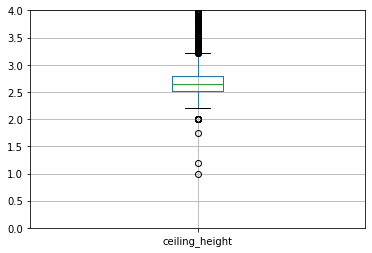

In [43]:
# постройка диаграммы размаха по высоте потолков
plt.ylim(0 , 4)
df.boxplot('ceiling_height' , grid=True , figsize=(16 , 8))

Как и предполагалось, по графику видно, что потолки ниже 2.3 метра и выше 3.3 метров являются выбросами. Но на практике в квартирах встречаются потолки под 4 метра высотой. Примем за норму высоту от 2.30 до 4 метров. Так как количество таких значений меньше 0.5 %, то можно их заполнить, например медианными значениями, которые не сильно исказят картину исследования.

In [44]:
# замена аномальных высот медианными значениями 
df.loc[df['ceiling_height'] >=4 , 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] <=2.2 , 'ceiling_height'] = df['ceiling_height'].median()

In [45]:
df['ceiling_height'].sort_values(ascending=False)

1975     3.98
12195    3.95
2674     3.95
2174     3.95
4915     3.95
         ... 
23679     NaN
23682     NaN
23684     NaN
23687     NaN
23688     NaN
Name: ceiling_height, Length: 23691, dtype: float64

Данные в столбце "is_apartment" заполнены чуть более чем на 10%, возможно был сбой при выгрузке данных, или поле заполнения при подаче заявления было не обязательно. Пропущенные данные не будем заполнять.

Посмотрим данные, полученные автоматизированной системой на пропуски, а также их распределение.

In [46]:
# обзор распределения данных в столбце 'airports_nearest'
df['airports_nearest'].describe()

count    18149.000000
mean     28795.207780
std      12632.874577
min          0.000000
25%      18582.000000
50%      26729.000000
75%      37275.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [47]:
# обзор распределения данных в столбце 'cityCenters_nearest'
df['cityCenters_nearest'].describe()

count    18172.000000
mean     14195.630916
std       8607.639290
min        181.000000
25%       9238.000000
50%      13102.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [48]:
# обзор распределения данных в столбце 'parks_around3000'
df['parks_around3000'].describe()

count    18173.000000
mean         0.611347
std          0.801988
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [49]:
# обзор распределения данных в столбце 'parks_nearest'
df['parks_nearest'].describe()

count    8075.000000
mean      490.736842
std       342.381514
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [50]:
# обзор распределения данных в столбце 'ponds_around3000'
df['ponds_around3000'].describe()

count    18173.000000
mean         0.770043
std          0.938278
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [51]:
# обзор распределения данных в столбце 'ponds_nearest'
df['ponds_nearest'].describe()

count    9105.000000
mean      518.102252
std       277.715394
min        13.000000
25%       294.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Данные, полученные автоматизированной системой имеют много пропусков, в некоторых из них, пропусков больше половины. Эти данные можно получить только вне исследования. Поэтому для нашего анализа не будем их привлекать.

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,45.0,9,NaN,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [53]:
# обзор распределения данных в столбце 'days_exposition'
df['days_exposition'].describe()

count    20511.000000
mean       180.807762
std        219.554243
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [54]:
# обзор самых больших значений в столбце с длительностью размещения объявлений
df['days_exposition'].sort_values(ascending=False).head(100)

18838    1580.0
1107     1572.0
9550     1553.0
1883     1513.0
20961    1512.0
          ...  
9637     1194.0
23240    1187.0
7088     1183.0
12806    1182.0
10791    1181.0
Name: days_exposition, Length: 100, dtype: float64

В данных по длительности размещения объявлений есть достаточно большое количество очень больших чисел, но распределение данных в этом списке не выглядит аномалией, так как эти значения уменьшаются достаточно равномерно. Рассмотрим их подробнее в дальнейшем анализе.

Определим долю пропусков в данных о названии населенного пункта.

In [55]:
# определение доли пропусков в наименовании населенных пунктов
print('Доля пропусков в названии населенных пунктов: {:.2%}'.format(df['locality_name'].isna().sum()/23699))

Доля пропусков в названии населенных пунктов: 0.21%


Доля пропусков в наименовании населенного пункта очень низкая, можно заполнить их наименованием "неизвестный".

In [56]:
# заполнение пропущенных значений в наименовании населенных пунктов
df['locality_name'] = df['locality_name'].fillna('неизвестный')

In [57]:
# проверка наличия пропусков в наименовании населенных пунктов
df['locality_name'].isna().sum()

0

### Шаг 2.2. Проверка данных на дубликаты.

В данных могут присутствовать дубликаты, необходимо проверить их наличие и удалить их. Сначала проверим данные на явные дубликаты.

In [58]:
# проверка данных на явные дубликаты
df.duplicated().sum()

0

Явных дубликатов в данных нет. Далее выясним есть ли неявные дубликаты. В таблице имеется единственный столбец, который может содержать данные, которые могут быть написаны с применением разного регистра, алфавита или порядка слов. Посмотрим уникальные значения в колонке с названиями населенных пунктов.

In [59]:
# просмотр уникальных значений в столбце с населенными пунктами
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

При изучении списка с уникальными значениями названий населенных пунктов, можно увидеть, что в списке присутствуют одни и те же населенные пункты, но написанные по-разному. В частности с применением типов населенных пунктов(поселок, село, деревня и т. д.). Необходимо очистить названия населенных пунктов от типа населенного пункта. Напишем функцию, которая принимает в качестве аргументов список с наименованиями типов населенных пунктов с пробелом в конце и пустую строку. Результатом работы функции будет удаление подстроки, содержащей наименование типа населенного пункта.

In [60]:
# создание функции, которая принимает аргументами список с наименованием типов населенных пунктов и пустую строку, внутри
# функции цикл перебирает элементы списка с наименованиями типов населенных пунктов, внутри цикла выполняется замена 
# подстроки в строке с наименованиями населенных пунктов на пустую подстроку
def replace_wrong_names(wrong_names , right_name):     
    for wrong_name in wrong_names: 
        df['locality_name'] = df['locality_name'].str.replace(wrong_name , right_name)

In [61]:
# создание списка с уникальными наименованиями типов населенных пунктов и переменной с пустой строкой
wrong_list = ['поселок ' , 'посёлок ' , 'село ' , 'деревня ' , 'посёлок городского типа ' , 'городской посёлок ' , 
               'поселок городского типа ' ,'поселок станции ' , 'садоводческое некоммерческое товарищество ' , 
               'поселок городского типа ' , 'посёлок при железнодорожной станции ' , 'посёлок станции ' ,
              'городского типа ' ,'городского типа ' , 'коттеджный ' , 'городской ' , 'садовое товарищество ' , 
              'станции ' , 'при железнодорожной станции ' , 'при железнодорожной ']
right_list = ''

In [62]:
# вызов функции по удалению типов населенных пунктов
replace_wrong_names(wrong_list , right_list)

In [63]:
# проверка списка уникальных значений наименования населенных пунктов
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Проверим данные на дубликаты.

In [64]:
# проверка данных на дубликаты
df.duplicated().sum()

0

Дубликатов в данных нет. Но изменение наименований населенных пунктов, даже при отстутствии дубликатов, поможет нам в дальнейшем исследовании при анализе параметров по отдельным населенным пунктам, так как мы объединили некоторые дублированнные наименования пунктов в уникальные. 

## Шаг 3.  Подсчет и добавление параметров в таблицу.

В таблице много столбцов, данные некоторых из них не будем использовать для исследования. Это прежде всего столбцы в котрых большое число пропусков, которые, не уточнив у менеджера нельзя заполнить, а также столбцы, данные в которых исходя из здравого смысла наврят ли могут быть существенными параметрами(балконы, студия). Следовательно произведем декомпозицию исходного датафрейма и оставим столбцы со стоимостью квартиры, площадью, датой размещения, количеством комнат, высотой потолков, наименованием населенных пунктов, удаленности от центра и продолжительности размещения объявления. 

In [65]:
# декомпозиция датафрейма
df = df[['last_price' , 'total_area' , 'first_day_exposition' , 'rooms' , 'ceiling_height' , 'floors_total' , 'living_area' , 'floor' , 'kitchen_area' , 'locality_name' , 'cityCenters_nearest' , 'days_exposition']]

In [66]:
# просмотр верхних строк обновленного датафрейма
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0


Для анализа необходим основной параметр, который и будем изучать в исследовании - это цена квадратного метра. Посчитаем его и добавим его значения в новый столбец датафрейма. 

In [67]:
# создание нового столбца с ценой квадратного метра
df['price_sqr_m'] = df['last_price'] / df['total_area']

В исследовании было бы хорошо изучить зависимость цены от дня, месяца и года размещения объявления. Создадим новые столбцы, в которые занесем данные о дне недели, месяце и годе размещения объявления. Для этого применим метод "to_datetime" c необходимым форматом даты, чтобы конвертировать данные о дате размещения объявления в формат даты. А затем применим методы "dt.weekday", "dt.month", "dt.year" к столбцу с датой размещения объявления, чтобы вычислить день недели, месяц и год размещения объявления. Занесем все полученные результаты в отдельные столбцы датафрейма.

In [68]:
# преобразование в формат даты данных столбца о дате размещения объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'] , format='%Y-%m-%dT%H:%M:%S')

In [69]:
# вычисление дня недели размещения объявления и сохранение в отдельный столбец
df['weekday_sale'] = df['first_day_exposition'].dt.weekday

In [70]:
# проверка верхней части таблицы
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,3
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,1
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,3
3,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0,408176.100629,4
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,1


In [71]:
# вычисление месяца размещения объявления и сохранение в отдельный столбец
df['month_sale'] = df['first_day_exposition'].dt.month

In [72]:
# проверка верхней части таблицы
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,3,3
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,1,12
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,3,8
3,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0,408176.100629,4,7
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,1,6


In [73]:
# вычисление года размещения объявления и сохранение в отдельный столбец
df['year_sale'] = df['first_day_exposition'].dt.year

In [74]:
# проверка верхней части таблицы
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,3,3,2019
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,1,12,2018
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,3,8,2015
3,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0,408176.100629,4,7,2015
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,1,6,2018


В обновленной таблице можно заметить, что неудобно читать номер дня недели, который записан в числовом формате от 0 до 6. Номер месяца является привычным, так же как и числовой формат года. Поэтому заменим числовые данные в столбце с днем недели размещения объявления на наименования дней недели. Для этого создадим функцию, которая в качестве аргумента принимает строку датафрейма, а возвращает наименование дня недели. 

In [75]:
# создание функции, принимающей строку датафрейма, а возвращает наименование дня недели
def weekday_word (row):
    if row['weekday_sale'] == 0:
        return 'понедельник'
    if row['weekday_sale'] == 1:
        return 'вторник'
    if row['weekday_sale'] == 2:
        return 'среда'
    if row['weekday_sale'] == 3:
        return 'четверг'
    if row['weekday_sale'] == 4:
        return 'пятница'
    if row['weekday_sale'] == 5:
        return 'суббота'
    if row['weekday_sale'] == 6:
        return 'воскресенье'

In [76]:
# применение функции методом apply к строкам датафрейма и запись данных в столбец
df['weekday_sale'] = df.apply(weekday_word , axis=1)

In [77]:
# проверка верхней части таблицы
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,четверг,3,2019
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,вторник,12,2018
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,четверг,8,2015
3,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0,408176.100629,пятница,7,2015
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,вторник,6,2018


Этажей в зданиях много, а влияние того, на каком этаже находится квартира, на цену необходимо проанализировать. Для этого укрупним данные по этажам, то есть создадим основные категории номера этажа: для первого, верхнего и остальных этажей. Создадим функцию, котрая принимает строку датафрейма, а возвращает наименование категории этажа.

In [78]:
# создание функции, котрая принимает строку датафрейма, а возвращает наименование категории этажа
def name_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [79]:
# применение функции методом apply к строкам датафрейма и запись данных в столбец
df['floor_name'] = df.apply(name_floor , axis=1)

In [80]:
# проверка верхней части таблицы
df.head(15)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name
0,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,Санкт-Петербург,16028.0,NaN,120370.370370,четверг,3,2019,другой
1,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,11.00,Шушары,18603.0,81.0,82920.792079,вторник,12,2018,первый
2,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,8.30,Санкт-Петербург,13933.0,558.0,92785.714286,четверг,8,2015,другой
3,64900000.0,159.00,2015-07-24,3,NaN,14,45.00,9,9.50,Санкт-Петербург,6800.0,424.0,408176.100629,пятница,7,2015,другой
4,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,Санкт-Петербург,8098.0,121.0,100000.000000,вторник,6,2018,другой
5,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,9.10,Янино-1,NaN,55.0,95065.789474,понедельник,9,2018,другой
6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,14.40,Парголово,19143.0,155.0,99195.710456,четверг,11,2017,другой
7,7915000.0,71.60,2019-04-18,2,NaN,24,30.50,22,18.90,Санкт-Петербург,11634.0,NaN,110544.692737,четверг,4,2019,другой
8,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,8.81,Мурино,NaN,189.0,87454.764777,среда,5,2018,другой
9,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,Санкт-Петербург,15008.0,289.0,88524.590164,воскресенье,2,2017,другой


В дополнение можно найти параметры отношения площади кухни и жилой площади к общей площади. Занесем полученные данные в новые столбцы.

In [81]:
# подсчет отношения площади кухни к общей площади и запись данных в новый столбец
df['liv_area_total'] = df['living_area'] / df['total_area']

In [82]:
# проверка верхней части таблицы
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,четверг,3,2019,другой,0.472222
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,вторник,12,2018,первый,0.460396
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,четверг,8,2015,другой,0.612500
3,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0,408176.100629,пятница,7,2015,другой,0.283019
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,вторник,6,2018,другой,0.320000


In [83]:
# подсчет отношения жилой площади к общей площади и запись данных в новый столбец
df['kitch_area_total'] = df['kitchen_area'] / df['total_area']

In [84]:
# проверка верхней части таблицы
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total,kitch_area_total
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,120370.370370,четверг,3,2019,другой,0.472222,0.231481
1,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,Шушары,18603.0,81.0,82920.792079,вторник,12,2018,первый,0.460396,0.272277
2,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,92785.714286,четверг,8,2015,другой,0.612500,0.148214
3,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,Санкт-Петербург,6800.0,424.0,408176.100629,пятница,7,2015,другой,0.283019,0.059748
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,100000.000000,вторник,6,2018,другой,0.320000,0.410000


Необходимые данные собраны, приступим к анализу основных параметров исследования.

## Шаг 4. Исследовательский анализ данных.

### Шаг 4.1. Исследование основных параметров по общей базе данных.

**Построим гистограммы основных параметров, влияющих на цену квартиры. Изучим распределение данных, выясним какие данные лучше не брать в расчет для дальнейшего анализа. Найдем выбросы, которые могут искажать дальнейшее исследование и удалим их.**

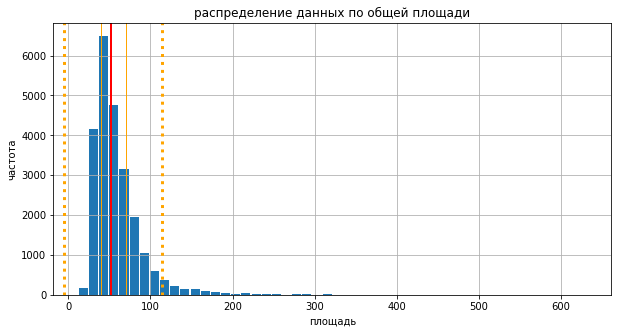

In [85]:
# создание гистограммы распределния по общей площади квартир. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['total_area'].quantile(0.75) - df['total_area'].quantile(0.25))
df.hist('total_area' , bins=50, rwidth=0.9, figsize=(10 , 5))
plt.title('распределение данных по общей площади')
plt.xlabel('площадь')
plt.ylabel('частота')
plt.axvline( x=df['total_area'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['total_area'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['total_area'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['total_area'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['total_area'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Половина всех данных по площади квартир находится в диапазоне до 52 кв. м., первая четверть до 40 кв. м., а максимальные нормальные значения находятся в диапазоне, ограниченном 1,5 межквартильным размахом примерно до 120 кв. м. Вцелом данные выглядят правдоподобно, за исключением, того, что самая малая площадь находится в районе 12 кв. м., но в последнее время, квартиры такого сегмента, особенно студии могут присутствовать на рынке. Распределение незначительно смещено к минимальным значениям, что говорит о значительном сегменте квартир с небольшой площадью. Максимальная площадь квартиры доходит до 631 кв. м., такое возможно в категории элитного жилья. 

In [86]:
# описание данных по столбцу с общей площадью квартир
df['total_area'].describe()

count    23691.00000
mean        60.23730
std         34.88976
min         12.00000
25%         40.00000
50%         52.00000
75%         69.80000
max        631.20000
Name: total_area, dtype: float64

In [87]:
# список с минимальными значениями объявлений по общей площади
df['total_area'].sort_values().head(30)

19897    12.00
19800    13.00
17956    13.00
19539    13.00
19551    13.20
19635    14.00
16944    15.00
12036    15.00
8883     15.50
9409     16.00
715      17.00
10204    17.00
22348    17.20
9154     17.60
21794    17.78
20707    18.00
6081     18.00
19305    18.00
4540     18.00
12992    18.00
8726     18.40
12877    18.50
8752     18.80
23183    18.90
8451     19.00
9813     19.00
5852     19.50
5310     20.00
10960    20.00
21411    20.00
Name: total_area, dtype: float64

In [88]:
# нахождение медианы распределения общей площади квартир
df['total_area'].median()

52.0

In [89]:
# определение границ выбросов по общей площади и нахождение их количества
q1s, q3s = np.percentile(df['total_area'] , [25,75])
iqrs = q3s -q1s
low_bs = q1s - 1.5*iqrs
high_bs = q3s + 1.5*iqrs
print('Количество объявлений свыше 1.5 интерквартильного размаха:',np.sum(df['total_area'] > high_bs))
print('Количество объявлений ниже 1.5 интерквартильного размаха:',np.sum(df['total_area'] < low_bs))
print('Верхнее пороговое значение:', df[df['total_area'] == high_bs]['total_area'])

Количество объявлений свыше 1.5 интерквартильного размаха: 1235
Количество объявлений ниже 1.5 интерквартильного размаха: 0
Верхнее пороговое значение: 16089    114.5
Name: total_area, dtype: float64


Количество объявлений, выходящих за пределы верхней 1.5-интерквартильной границы 1235 - это довольно много. По стандартам жилья площадь квартиры не должна быть меньше 33 кв. м., а жилой площади на человека не менее 18 кв. м.. Возьмем нижнюю границу в 20 кв. м., а более 120 кв. м за верхнюю, объявления с такими параметрами встречаются уже крайне редко. Удалим данные за пределами этих значений. 

In [90]:
# определение количества объявлений с выбросами и неразумно низкой площадью квартир
df.loc[(df['total_area'] < 20) | (df['total_area'] > 120)]['total_area'].count()

1081

In [91]:
# удаление выбросов по общей площади
df = df.drop(df.loc[(df.loc[:,'total_area'] < 20) | (df.loc[:,'total_area'] > 120)].index).reset_index(drop=True)

In [92]:
# проверка количества выбросов
df.loc[(df['total_area'] < 20) | (df['total_area'] > 120)]['total_area'].count()

0

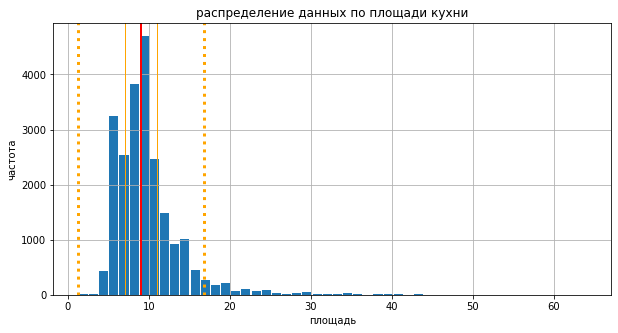

In [93]:
# создание гистограммы распределния по площади кухни. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['kitchen_area'].quantile(0.75) - df['kitchen_area'].quantile(0.25))
df.hist('kitchen_area' , bins=50, rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по площади кухни')
plt.xlabel('площадь')
plt.ylabel('частота')
plt.axvline( x=df['kitchen_area'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['kitchen_area'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['kitchen_area'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['kitchen_area'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['kitchen_area'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Данные по площади кухни имеют форму распределения, в целом похожую на распределение общей жилой площади. Медианное и среднее значение близки, наибольший сегмент квартир находится в районе этих значений. форма распределения около нормальной. Кухни в районе до 20 кв. м. находятся на верхней границе обычных значений. Кухни с площадью более 20 кв. м. имеют редкое распространение. В общем, так как распределение данных аналогично общей площади квартир, для дальнейшего анализа этот параметр брать не будем. 

In [94]:
# описание данных по столбцу с площадью кухни
df['kitchen_area'].describe()

count    22411.000000
mean         9.915525
std          4.318894
min          1.300000
25%          7.100000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

In [95]:
# нахождение медианы распределения площади кухни
df['kitchen_area'].median()

9.0

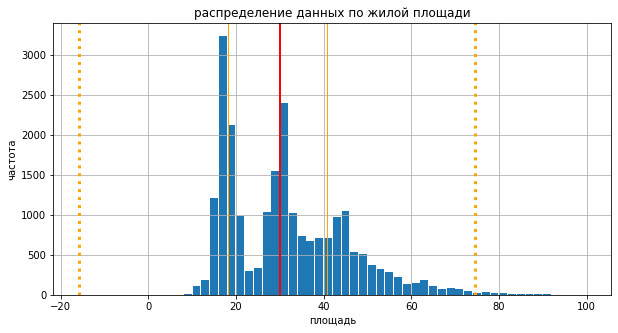

In [96]:
# создание гистограммы распределния по жилой площади. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['living_area'].quantile(0.75) - df['living_area'].quantile(0.25))
df.hist('living_area' , bins=50, rwidth=0.9 , range=(0 , 100) , figsize=(10 , 5))
plt.title('распределение данных по жилой площади')
plt.xlabel('площадь')
plt.ylabel('частота')
plt.axvline( x=df['living_area'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['living_area'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['living_area'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['living_area'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['living_area'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

В распределении данных по жилой площади видны некоторые аномалии. Распределение данных выражено неравномерно. Наблюдаются три пика: более 3000 квартир в районе 15 кв. м., около 2500 квартир в районе 30 кв. м и около 1000 квартир в районе 45 кв. м. Возможно это объясняется наиболее популярными площадями в сегментах 1, 2, 3 - комнатныхквартир. Есть очень малая часть квартир с жилой площадью до 10 кв. м. За полуторный интерквартильный размах выходят квартиры с жилой площадью более 80 кв. м. Большая площадь встречаается крайне редко и вероятно принадлежит к элитному сектору недвижимости. Вцелом же, учитывая неравномерность распределения, брать в расчет этот параметр для дальнейшего анализа не будем.

In [97]:
# описание данных по столбцу с жилой площадью
df['living_area'].describe()

count    22610.000000
mean        31.323048
std         13.849094
min          2.000000
25%         18.082500
50%         30.000000
75%         40.700000
max        145.000000
Name: living_area, dtype: float64

In [98]:
# нахождение медианы распределения жилой площади квартир
df['living_area'].median()

30.0

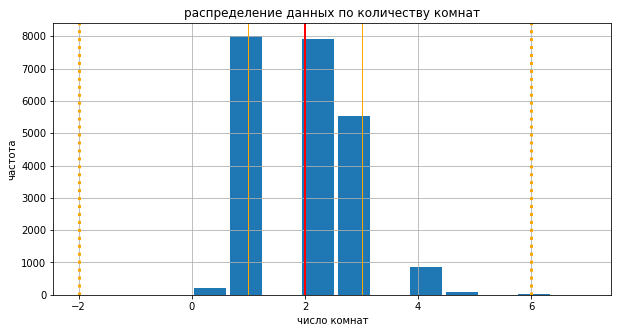

In [99]:
# создание гистограммы распределния по количеству комнат. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['rooms'].quantile(0.75) - df['rooms'].quantile(0.25))
df.hist('rooms' , bins=11, rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по количеству комнат')
plt.xlabel('число комнат')
plt.ylabel('частота')
plt.axvline( x=df['rooms'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['rooms'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['rooms'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['rooms'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['rooms'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')


Распределение количества комнат по данным смещены  вправо. В основном это квартиры с одной и двумя комнатами, в районе 8000 квартир в каждой категории, 3-комнатных в районе 6000. Доля остальных квартир с увеличинием комнат резко стремится к нулю. Среднее и медианное значение приходится на 2-комнатные квартиры.

In [100]:
# описание данных по столбцу с количеством комнат
df['rooms'].describe()

count    22610.000000
mean         1.962229
std          0.910224
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [101]:
# нахождение медианы распределения по количеству комнат
df['rooms'].median()

2.0

In [102]:
# удаление выбросов по количеству комнат
df = df.drop(df.loc[df.loc[:,'rooms'] > 5].index).reset_index(drop=True)

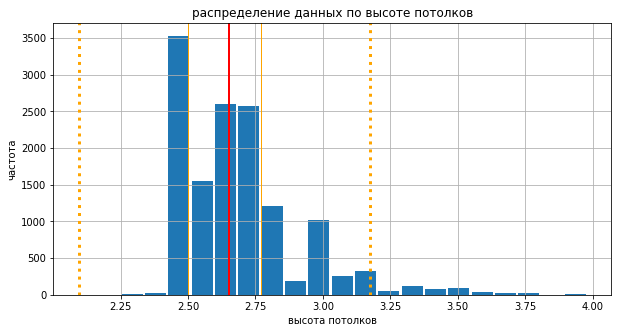

In [103]:
# создание гистограммы распределния по высоте потолков. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['ceiling_height'].quantile(0.75) - df['ceiling_height'].quantile(0.25))
df.hist('ceiling_height' , bins=20, rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по высоте потолков')
plt.xlabel('высота потолков')
plt.ylabel('частота')
plt.axvline( x=df['ceiling_height'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['ceiling_height'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['ceiling_height'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['ceiling_height'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['ceiling_height'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Распределение в данных по высоте потолков имеет неравномерный характер. Наибольшее количество значений находится в районе 2.5 метров(около 3500 квартир), следующие группы в районе медианы(2.65 метра) около 2500 квартир с медианным значением, с увеличением высоты потолков за 3 метра количество квартир резко уменьшается. Провалы в количестве возможно объясняются небольшим количеством нестандартной высоты потолков.

In [104]:
# описание данных по столбцу с высотой потолков
df['ceiling_height'].describe()

count    13748.000000
mean         2.696680
std          0.225387
min          2.250000
25%          2.500000
50%          2.650000
75%          2.770000
max          3.980000
Name: ceiling_height, dtype: float64

In [105]:
# нахождение медианы распределения по высоте потолков
df['ceiling_height'].median()

2.65

Из графика видно, что данные по объявлениям с квартирами с высотой потолков более 3.25 метров являются выбросами, удалим их  

In [106]:
# определение количества объявлений с выбросами по высоте потолков
print('Количество выбросов по высоте потолков:', df.loc[(df['ceiling_height'] > 3.25)]['ceiling_height'].count())

Количество выбросов по высоте потолков: 415


In [107]:
# удаление выбросов по высоте потолков
df = df.drop(df.loc[df.loc[:,'ceiling_height'] > 3.25].index).reset_index(drop=True)

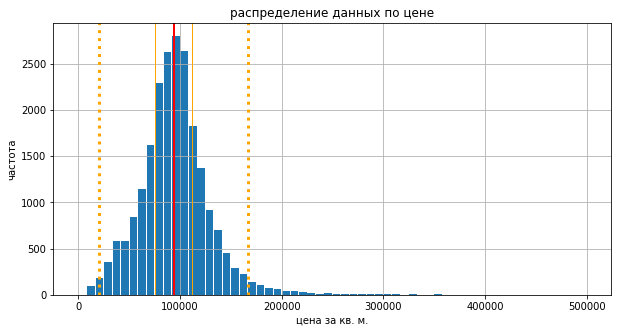

In [108]:
# создание гистограммы распределния по цене за кв. м.. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['price_sqr_m'].quantile(0.75) - df['price_sqr_m'].quantile(0.25))
df.hist('price_sqr_m' , bins=60 , rwidth=0.9 , range=(0 , 500000) ,  figsize=(10 , 5))
plt.title('распределение данных по цене')
plt.xlabel('цена за кв. м.')
plt.ylabel('частота')
plt.axvline( x=df['price_sqr_m'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['price_sqr_m'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['price_sqr_m'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['price_sqr_m'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['price_sqr_m'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')


Распределение данных по цене за квадратный метр является симметричным. Пик значений наблюдается ровно на медиане, на значении в 95000 р. Есть 1 минимальное значение(явно ошибка) в 112 р. За пределами полуторного интерквартильного размаха находятся значения, стремящиеся к минимуму ниже 20000 р. и к максимуму за пределы 176000 р. за кв. м.. 

In [109]:
# нахождение медианы распределения по высоте потолков
df['price_sqr_m'].median()

93877.55102040817

In [110]:
# вывод на экран списка с ценой за квадратный метр по возрастанию
df['price_sqr_m'].sort_values(ascending=True).head(10)

8217       111.834862
13944     7962.962963
4090      9615.384615
10623    10185.185185
8958     10368.663594
21982    10561.797753
5305     10714.285714
18206    10769.230769
8859     10897.435897
14942    10925.925926
Name: price_sqr_m, dtype: float64

In [111]:
# описание данных по столбцу с ценой за квадратный метр
df['price_sqr_m'].describe().apply("{0:.0f}".format)

count     22183
mean      95616
std       36999
min         112
25%       75532
50%       93878
75%      112121
max      721519
Name: price_sqr_m, dtype: object

In [112]:
# определение границ выбросов по цене квартир и нахождение их количества
q1p, q3p = np.percentile(df['price_sqr_m'] , [25,75])
iqrp = q3p -q1p
low_bp = q1p - 1.5*iqrp
high_bp = q3p + 1.5*iqrp
print('Количество объявлений свыше 1.5 интерквартильного размаха:',np.sum(df['price_sqr_m'] > high_bp))
print('Количество объявлений ниже 1.5 интерквартильного размаха:',np.sum(df['price_sqr_m'] < low_bp))
print('Верхнее пороговое значение:', df[df['price_sqr_m'] == high_bp]['price_sqr_m'])

Количество объявлений свыше 1.5 интерквартильного размаха: 635
Количество объявлений ниже 1.5 интерквартильного размаха: 184
Верхнее пороговое значение: Series([], Name: price_sqr_m, dtype: float64)


In [113]:
# удаление выбросов по общей площади
df = df.drop(df.loc[(df.loc[:,'price_sqr_m'] < low_bp) | (df.loc[:,'price_sqr_m'] > high_bp)].index).reset_index(drop=True)

In [114]:
# проверка количества выбросов по цене
df.loc[(df['price_sqr_m'] < low_bp) | (df['price_sqr_m'] > high_bp)]['price_sqr_m'].count()

0

In [115]:
# описание данных по столбцу с длительностью размещения объявления 
df['days_exposition'].describe().apply("{0:.0f}".format)

count    18750
mean       174
std        212
min          1
25%         44
50%         92
75%        221
max       1580
Name: days_exposition, dtype: object

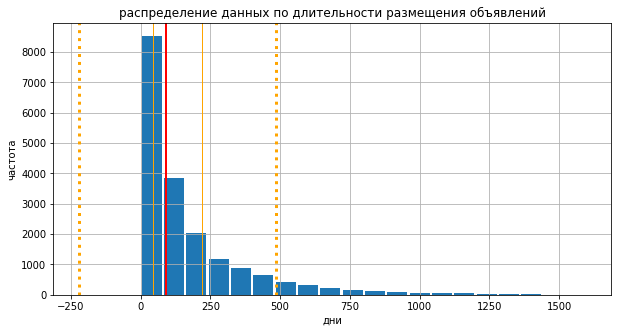

In [116]:
# создание гистограммы распределния по продолжительности размещения объявления.Красной вертикальной линией показана медиана
# значений, тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями 
# показаны полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['days_exposition'].quantile(0.75) - df['days_exposition'].quantile(0.25))
df.hist('days_exposition', bins=20, rwidth=0.9 , range=(0 , 1600) , figsize=(10 , 5))
plt.title('распределение данных по длительности размещения объявлений')
plt.xlabel('дни')
plt.ylabel('частота')
plt.axvline( x=df['days_exposition'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df['days_exposition'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df['days_exposition'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df['days_exposition'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['days_exposition'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Данные по продолжительности размещения объявлений имеют плавный нисходящий тренд вправо с увеличением длительности размещения. То есть группы с наибольшим числом объявлений о продаже квартир находятся в районе около 50 дней. Но также велико количество продаж за минимальное количество дней, в том числе за несколько дней. Есть даже квартира c эталонно быстрой продажей в мае 2019 года за 1 день, и 3 квартиры, проданные за 2 дня.  Разница между средним и медианным значением составляет почти 3 месяца, что говорит о сильном смещении данных и желательной проверке данных у менеджера. Возможно данные смещены, так как объявления снимались по каким-либо причинам слишком быстро, не обязательно из-за продажи. **Обычные продажи занимают от 40 дней до половины года, необычно быстро квартиры продаются быстрее месяца, а продажи дольше половины года можно назвать неразумно долгими.**

In [117]:
# подсчет количества объявлений с длительностью размещения в 1 день
df[df['days_exposition'] ==1]['days_exposition'].count()

1

In [118]:
# вывод строки с объявлением, снятым с продажи за 1 день
df[df['days_exposition'] ==1]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total,kitch_area_total
1450,4000000.0,49.9,2019-05-01,2,2.5,9,25.0,1,10.0,Санкт-Петербург,14384.0,1.0,80160.320641,среда,5,2019,первый,0.501002,0.200401


In [119]:
# вывод на экран строк с наименьшим числом дней продажи
df['days_exposition'].sort_values()

1450     1.0
14486    2.0
11793    2.0
11415    3.0
3152     3.0
        ... 
21347    NaN
21350    NaN
21351    NaN
21361    NaN
21363    NaN
Name: days_exposition, Length: 21364, dtype: float64

Из графика ясно, что продажи за пределами 500 дней являются выбросами и такая информация могла появиться вследствие автоматического продления объявлений после продажи или каких-либо причин технического характера. Найдем количество таких объявлений и удалим их. 

In [120]:
# определение количества объявлений с выбросами по длительности размещения
print('Количество выбросов по длительности размещения объявлений:', df.loc[(df['days_exposition'] > 500)]['days_exposition'].count())

Количество выбросов по длительности размещения объявлений: 1475


In [121]:
# удаление выбросов по длительности размещения
df = df.drop(df.loc[df.loc[:,'days_exposition'] > 500].index).reset_index(drop=True)

In [122]:
# описание данных по столбцу с длительностью размещения объявления
df['days_exposition'].describe()

count    17275.000000
mean       124.746223
std        117.977058
min          1.000000
25%         40.000000
50%         81.000000
75%        178.000000
max        500.000000
Name: days_exposition, dtype: float64

In [123]:
# нахождение медианы распределения по длительности размещения объявления
df['days_exposition'].median()

81.0

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19889 entries, 0 to 19888
Data columns (total 19 columns):
last_price              19889 non-null float64
total_area              19889 non-null float64
first_day_exposition    19889 non-null datetime64[ns]
rooms                   19889 non-null int64
ceiling_height          11921 non-null float64
floors_total            19889 non-null int32
living_area             19889 non-null float64
floor                   19889 non-null int64
kitchen_area            19704 non-null float64
locality_name           19889 non-null object
cityCenters_nearest     14960 non-null float64
days_exposition         17275 non-null float64
price_sqr_m             19889 non-null float64
weekday_sale            19889 non-null object
month_sale              19889 non-null int64
year_sale               19889 non-null int64
floor_name              19889 non-null object
liv_area_total          19889 non-null float64
kitch_area_total        19704 non-null float64
dtyp

На этом этапе, при исследовании данных по общей базе объявлений мы нашли и удалили выбросы в данных, которые могли бы искажать дальнейшую картину исследования.

In [125]:
print('Доля удаленных данных после исследования на выбросы равна:{:.2%}'.format((23699-19889)/23699))

Доля удаленных данных после исследования на выбросы равна:16.08%


In [126]:
# КОД РЕВЬЮЕРА

df[['last_price', 'price_sqr_m', 'days_exposition', 'total_area', 'rooms', 'ceiling_height']].describe().loc[['min', 'max']]

,last_price,price_sqr_m,days_exposition,total_area,rooms,ceiling_height
min,630000.0,20661.157025,1.0,20.0,0.0,2.25
max,19400000.0,166919.575114,500.0,120.0,5.0,3.25


### Шаг 4.2. Исследование влияния параметров на цену квартиры.

Запишем в переменную таблицу с основными показателями, влияющими на цену квартиры.

In [127]:
# создание переменной с данными, влияющими на цену
df_price = df[['price_sqr_m' , 'total_area' ,'kitchen_area' , 'rooms' , 'ceiling_height' , 'cityCenters_nearest' , 'weekday_sale' , 'month_sale' , 'year_sale' , 'floor_name' ]]

Изучим коэффициэнты корреляции цены с различными параметрами.

In [128]:
# таблица с коэффициэнтами корреляции
df_price.corr()

,price_sqr_m,total_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest,month_sale,year_sale
price_sqr_m,1.000000,0.030088,0.251329,-0.164561,0.285630,-0.397849,-0.004690,0.084665
total_area,0.030088,1.000000,0.458326,0.795005,0.346019,-0.143262,0.010177,-0.038441
kitchen_area,0.251329,0.458326,1.000000,0.079911,0.364726,-0.100336,0.019837,-0.023035
rooms,-0.164561,0.795005,0.079911,1.000000,0.085529,-0.090335,-0.003481,-0.016507
ceiling_height,0.285630,0.346019,0.364726,0.085529,1.000000,-0.256192,0.002858,-0.069993
cityCenters_nearest,-0.397849,-0.143262,-0.100336,-0.090335,-0.256192,1.000000,-0.015057,0.011351
month_sale,-0.004690,0.010177,0.019837,-0.003481,0.002858,-0.015057,1.000000,-0.300083
year_sale,0.084665,-0.038441,-0.023035,-0.016507,-0.069993,0.011351,-0.300083,1.000000


Из данных видно, что наибольшее влиянее на цену квартиры оказывают площадь, высота потолков и удаленность от центра(обратная зависимость, чем меньше значение, тем выше цена). Почти не влияют на цену количество комнат, год и месяц продажи. Рассмотрим все эти параметры подробнее, применяя диаграммы рассеяния и хитмэп.

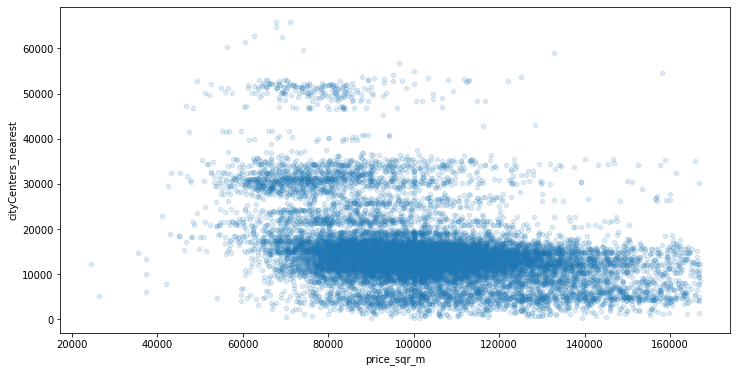

In [129]:
# диаграмма рассеяния зависимости цены от удаленности от центра
df_price.plot(x='price_sqr_m' , y='cityCenters_nearest' , kind='scatter' , alpha=0.15 , figsize=(12 , 6))

По графику понятно, что цена в среднем увеличивается с приближением к центру, наблюдается довольно большая концентрация дорогих объектов, очевидно в центральной зоне. Далее рассмотрим центральный район Санкт-Петербурга подробнее.

Рассмотрим зависимость цены от высоты потолков квартир.

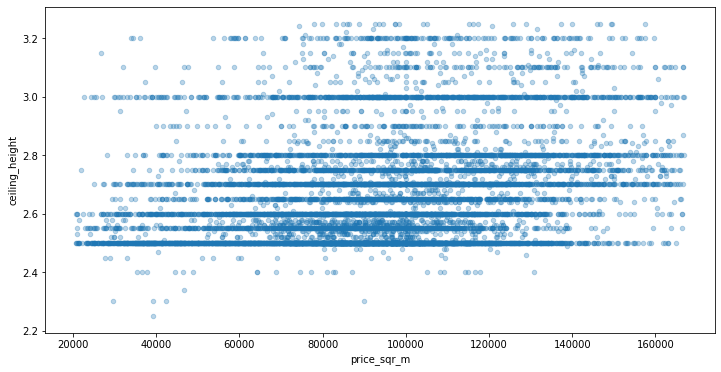

In [130]:
# диаграмма рассеяния зависимости цены от высоты потолков
df_price.plot(x='price_sqr_m' , y='ceiling_height' , kind='scatter' , alpha=0.3 , figsize=(12 , 6))

Прямой зависимости цены от высоты потолков не видно. Есть отдельные значения, например 3.0 метра, 3.2, значения между 2.5 и 2.75, при которых проявляется закономерность роста к. м., но распределение довольно не равномерно. Наименьшая цена в квартирах с самыми низкими и самыми высокими потолками, но и количество объектов при этих показателях самое малое. 

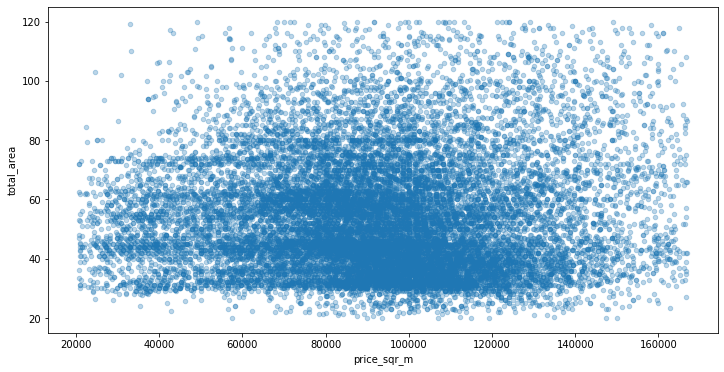

In [131]:
# диаграмма рассеяния зависимости цены от площади квартиры
df_price.plot(x='price_sqr_m' , y='total_area' , kind='scatter' , alpha=0.3 , figsize=(12 , 6))

Из графика заметно, что влияние площади квартиры на цену квадратного метра вообщем-то не наблюдается, лишь в дешевом сегменте заментна большая концентрация небольших квартир. Рассмотрим далее зависимость цены от количества комнат.

Для этого построим хитмэп , сведя данные по количеству комнат, используя среднюю цену и медиану. Предпочтение в анализе отдадим медианным значениям, так как они меньше искажают ход исследования.

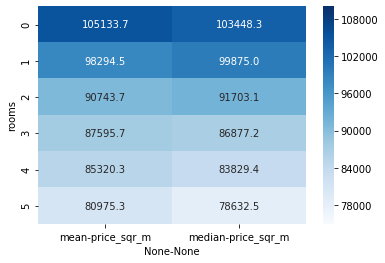

In [132]:
# построение хитмэп, исходя из сведенных данных по количеству комнат с посчитанной средней и медианной ценой
sns.heatmap(df_price.pivot_table(index='rooms' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=75000 , vmax=110000 , cmap='Blues')

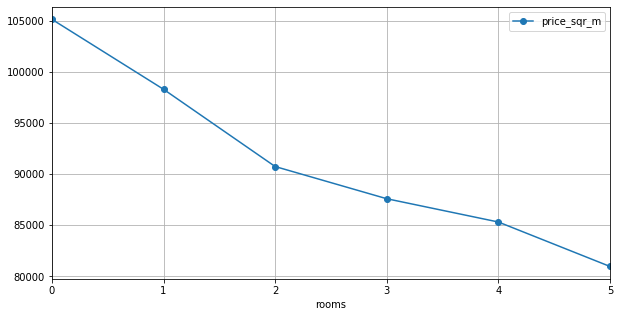

In [133]:
# построение графика зависимости средней цены от количества комнат
df_price.pivot_table(index='rooms' , values='price_sqr_m', aggfunc='mean').plot(style='o-', grid=True,  figsize=(10 , 5))

По медианной цене видно, что наибольшая цена за квадратный метр наблюдается за квартиры-студии и 1-комнатные. Далее, с увеличением количества комнат цена снижается, в совокупности около 20 %. Но во втором случае скорее всего наибольшее влияние оказывают выбивающиеся максимальные значения квартир премиум-сегмента.  

In [134]:
# настройка формата вывода чисел с двумя знаками после точки 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Посмотрим влияние этажа квартиры на ее цену. Построим хитмэп по категориям высоты потолков со средними и медианными значениями цен. 

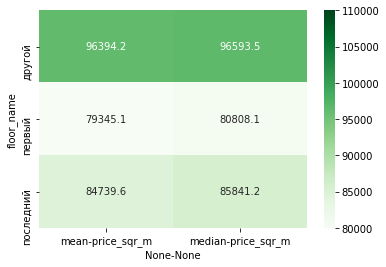

In [135]:
# построение хитмэп, исходя из сведенных данных по этажу квартиры с посчитанной средней и медианной ценой
sns.heatmap(df_price.pivot_table(index='floor_name' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=80000 , vmax=110000 , cmap='Greens')


Наименьшая цена у квартир на первом этаже, далее дороже примерно на 5 % самые последние этажи, еще в среднем на 10 % дороже квартиры в середине дома, начиная со второго до предпоследнего. К тому же влияние номера этажа на цену довольно значительное, между первыми и серединой около 20 %, при чем как по медианным значениям, так и по средним.

Далее изучим влияние дня недели выставления объявления на цену. Построим хитмэп по сведенным данным.

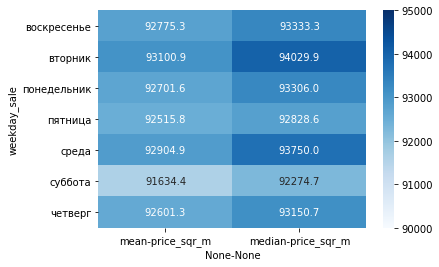

In [136]:
# построение хитмэп, исходя из сведенных данных по дню недели объявления с посчитанной средней и медианной ценой
sns.heatmap(df_price.pivot_table(index='weekday_sale' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=90000 , vmax=95000 , cmap='Blues')

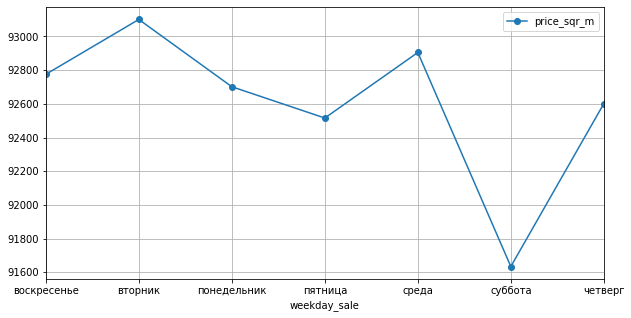

In [137]:
# построение графика зависимости средней цены от дня недели
df_price.pivot_table(index='weekday_sale' , values='price_sqr_m', aggfunc='mean').plot(style='o-', grid=True,
                                                                                       figsize=(10 , 5))

Наибольшая цена квартир наблюдается при выставлении объявления в середине недели, наименьшая в субботу. Но корреляция очень мала - в пределах 2 %.

Изучим влияние месяца выставления объявления на цену квартиры. Построим хитмэп со сведенными данными.

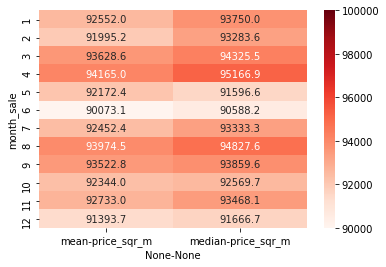

In [138]:
# построение хитмэп, исходя из сведенных данных по месяцу объявления с посчитанной средней и медианной ценой
sns.heatmap(df_price.pivot_table(index='month_sale' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=90000 , vmax=100000 , cmap='Reds')

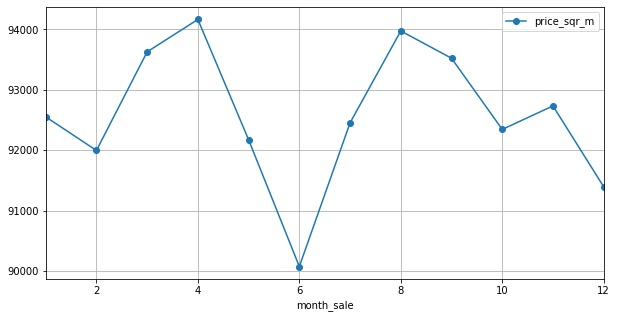

In [139]:
# построение графика зависимости средней цены от месяца размещения
df_price.pivot_table(index='month_sale' , values='price_sqr_m', aggfunc='mean').plot(style='o-', grid=True,  figsize=(10 , 5))

Самые низкие цены на квартиры, при размещении их на продажу в мае и июне, а наивысокие в апреле и августе. Но в общем влияние минимально, около 3 %.

Посмотрим зависимость цены  от года размещения объявления. Построим хитмэп на основе сведенных данных средней и медианной цены по году объявления.

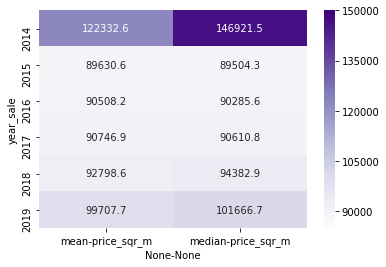

In [140]:
# построение хитмэп, исходя из сведенных данных по году объявления с посчитанной средней и медианной ценой
sns.heatmap(df_price.pivot_table(index='year_sale' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=85000 , vmax=150000 , cmap='Purples')

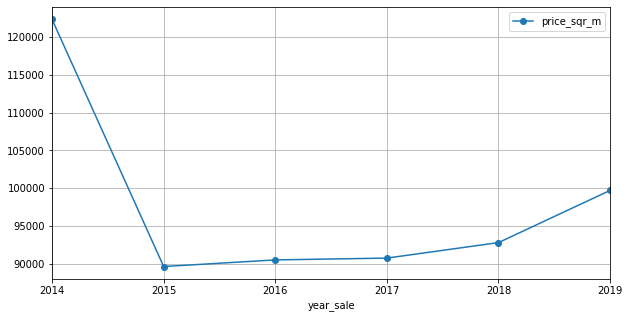

In [141]:
#построение графика зависимости средней цены от месяца размещения
df_price.pivot_table(index='year_sale' , values='price_sqr_m', aggfunc='mean').plot(style='o-', grid=True,  
                                                                                     figsize=(10 , 5))

По данным видно, что самая высокая цена была при размещении объявления в 2014 году, возможно резкий рост курса иностранных валют и кризисная ситуация сказалась. Но в 2019 году, цена также выросла, но незначительно. Очевидно, что объявления, которые выставляются с завышенной ценой могут продаваться долго, а рыночная цена за этот период может упасть, соответственно могут появляться аномально долгие продажи. Самы низкие цены были за 2016 год.                  Далее изучим цены на недвижимость в 10 самых крупных населенных пунктах базы.

### Шаг 4.3. Анализ цены квартир по населенным пунктам.

Выберем населенные пункты с самым большим количеством объявлений и сравним цены в них.

In [142]:
# Определяем 10 населенных пунктов с самым большим количеством объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург    12728
Мурино               556
Кудрово              435
Шушары               414
Всеволожск           362
Колпино              319
Пушкин               314
Парголово            311
Гатчина              277
Выборг               212
Name: locality_name, dtype: int64

In [143]:
# определение среза данных по выбранным населенным пунктам
df_city = df.query('locality_name.isin(["Санкт-Петербург" , "Мурино" , "Кудрово" , "Шушары" , "Всеволожск" , "Пушкин" , "Колпино" , "Парголово" , "Гатчина" , "Выборг"])')
df_city.head(60)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total,kitch_area_total
0,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,Санкт-Петербург,16028.00,nan,120370.37,четверг,3,2019,другой,0.47,0.23
1,3350000.00,40.40,2018-12-04,1,nan,11,18.60,1,11.00,Шушары,18603.00,81.00,82920.79,вторник,12,2018,первый,0.46,0.27
2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,Санкт-Петербург,8098.00,121.00,100000.00,вторник,6,2018,другой,0.32,0.41
4,3700000.00,37.30,2017-11-02,1,nan,26,10.60,6,14.40,Парголово,19143.00,155.00,99195.71,четверг,11,2017,другой,0.28,0.39
5,7915000.00,71.60,2019-04-18,2,nan,24,30.50,22,18.90,Санкт-Петербург,11634.00,nan,110544.69,четверг,4,2019,другой,0.43,0.26
6,2900000.00,33.16,2018-05-23,1,nan,27,15.43,26,8.81,Мурино,nan,189.00,87454.76,среда,5,2018,другой,0.47,0.27
7,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,Санкт-Петербург,15008.00,289.00,88524.59,воскресенье,2,2017,другой,0.71,0.11
8,5050000.00,39.60,2017-11-16,1,2.67,12,20.30,3,8.50,Санкт-Петербург,13878.00,137.00,127525.25,четверг,11,2017,другой,0.51,0.21
12,4400000.00,36.00,2016-06-23,1,nan,6,17.00,1,8.00,Пушкин,30759.00,203.00,122222.22,четверг,6,2016,первый,0.47,0.22
13,4650000.00,39.00,2017-11-18,1,nan,14,20.50,5,7.60,Санкт-Петербург,14259.00,19.00,119230.77,суббота,11,2017,другой,0.53,0.19


In [144]:
# сведение данных с медианными и средними ценами за кв. м. в 10 населенных пунктах в таблицу
df_city_price = df_city.pivot_table(index='locality_name' , values='price_sqr_m' , aggfunc=['mean' , 'median'])
df_city_price

,mean,median
,price_sqr_m,price_sqr_m
locality_name,,
Всеволожск,67124.01,65594.70
Выборг,58096.72,57753.95
Гатчина,69480.55,67796.61
Колпино,75329.28,74657.53
Кудрово,95549.64,96153.85
Мурино,86332.23,86311.91
Парголово,90077.95,91428.57
Пушкин,101434.05,99596.34


In [145]:
# переименование столбцов в сведенной таблице
df_city_price.columns = ['mean_price' , 'median_price']

Построим хитмэп с ценами, распределенными по населенным пунктам, и сравним их.

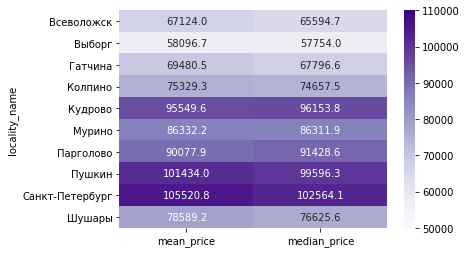

In [146]:
# построение хитмэп, исходя из сведенных данных по населенному пункту с посчитанной средней и медианной ценой
sns.heatmap(df_city_price, annot=True, fmt='.1f' , vmin=50000 , vmax=110000 , cmap='Purples')

Как и ожидалось, самая высокая цена за квартиру в Санкт-Петербурге(в среднем около 105000 за кв. м). А самая низкая цена в Выборге(который аж недалеко от Финляндии), почти в 2 раза ниже, чем в Питере. Что ж, удаленность от центра региона, скорее всего сказывается в первую очередь на цену. Посмотрим, как в свою очередь удаленность от центра в самом Санкт-Петербурге влияет на цену недвижимости.

### Шаг 4.4. Анализ влияния параметров на цену в Санкт-Петербурге.

Зададим срез данных, в которые будут включены только строки с городом Санкт-Петербург

In [147]:
# определение среза данных с Санкт-Петербургом
df_snt_ptrg = df_city.query('locality_name.isin(["Санкт-Петербург"])')
df_snt_ptrg.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total,kitch_area_total
0,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,Санкт-Петербург,16028.00,nan,120370.37,четверг,3,2019,другой,0.47,0.23
2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,Санкт-Петербург,8098.00,121.00,100000.00,вторник,6,2018,другой,0.32,0.41
5,7915000.00,71.60,2019-04-18,2,nan,24,30.50,22,18.90,Санкт-Петербург,11634.00,nan,110544.69,четверг,4,2019,другой,0.43,0.26
7,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,Санкт-Петербург,15008.00,289.00,88524.59,воскресенье,2,2017,другой,0.71,0.11
8,5050000.00,39.60,2017-11-16,1,2.67,12,20.30,3,8.50,Санкт-Петербург,13878.00,137.00,127525.25,четверг,11,2017,другой,0.51,0.21


Посчитаем процент пропусков в данных по удаленности от центра по датафрейму с Санкт-Петербургом.

In [148]:
# подсчет доли пропусков в данных удаленности от центра 
print('процент пропусков в столбце расстояние до центра: {:.2%}'.format(df_snt_ptrg['cityCenters_nearest'].isna().sum()/15721))

процент пропусков в столбце расстояние до центра: 0.25%


Доля пропусков очень мала, заполним ее медианным значением по столбцу.

In [149]:
# заполнение пропусков медианным значением
df_snt_ptrg['cityCenters_nearest'] = df_snt_ptrg['cityCenters_nearest'].fillna(df_snt_ptrg['cityCenters_nearest'].median())

In [150]:
# преобразование данных столбца удаленности от центра в целочисленный формат и запись в отдельный столбец
df_snt_ptrg['city_centr_km'] = (df_snt_ptrg['cityCenters_nearest'] / 1000).astype('int')

In [151]:
# вывод на экран верхушки таблицы
df_snt_ptrg.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total,kitch_area_total,city_centr_km
0,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,Санкт-Петербург,16028.00,nan,120370.37,четверг,3,2019,другой,0.47,0.23,16
2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,Санкт-Петербург,8098.00,121.00,100000.00,вторник,6,2018,другой,0.32,0.41,8
5,7915000.00,71.60,2019-04-18,2,nan,24,30.50,22,18.90,Санкт-Петербург,11634.00,nan,110544.69,четверг,4,2019,другой,0.43,0.26,11
7,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,6.50,Санкт-Петербург,15008.00,289.00,88524.59,воскресенье,2,2017,другой,0.71,0.11,15
8,5050000.00,39.60,2017-11-16,1,2.67,12,20.30,3,8.50,Санкт-Петербург,13878.00,137.00,127525.25,четверг,11,2017,другой,0.51,0.21,13


In [152]:
# описание данных в столбце по удаленности от центра
df_snt_ptrg['city_centr_km'].describe()

count   12728.00
mean       11.98
std         4.39
min         0.00
25%        10.00
50%        12.00
75%        15.00
max        29.00
Name: city_centr_km, dtype: float64

Сведем данные в таблицу по средней цене квартир на каждом километре удаления их от центра Санкт-Петербурга.

In [153]:
# сведение данных об удаленности от центра квартир на каждом километре по средней цене
df_snt_ptrg_price = df_snt_ptrg.pivot_table(index='city_centr_km' , values='price_sqr_m')
df_snt_ptrg_price.head()

,price_sqr_m
city_centr_km,
0,113312.88
1,117013.84
2,113455.38
3,108925.92
4,119045.53


Определим район центра города Санкт-Петербурга, исходя из предполагаемого резкого роста средней цены и примерного радиуса центральной части города. построим график по сведенным данным.

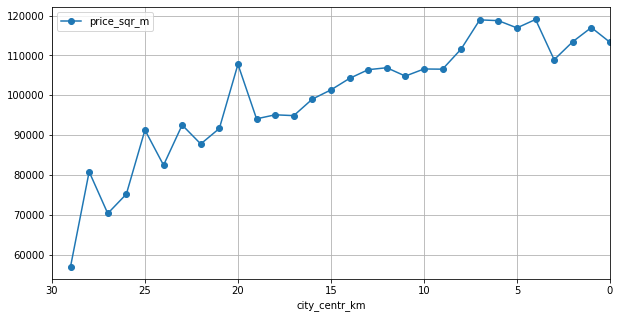

In [154]:
# построение графика изменения средней цены квартиры в зависимости от километража до центра города
df_snt_ptrg_price.plot( y='price_sqr_m' , xlim=(30, 0) , style='o-' , grid=True , figsize=(10 , 5))

На графике видно, что наблюдается общий тренд роста цен на квартиры при приближении к центру города. Кроме того, с 7 по 4 километр наблюдаются очень высокие цены, что может объясняться высокими ценами на недвижимость в каких-то конкретных новых районах, где строится новое элитное жилье. Также заметен резкий рост, начиная с 3 до 1 километра от центра, что примерно совпадает с географическим, историческим и культурным центром города. Определим центральную часть города, начиная с 3-го километра до центра. 

In [155]:
# определение среза данных центральной части города и запись данных в новый датафрейм 
df_snt_ptrg_centr = df_snt_ptrg.query('cityCenters_nearest <= 3000')
df_snt_ptrg_centr

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_sqr_m,weekday_sale,month_sale,year_sale,floor_name,liv_area_total,kitch_area_total,city_centr_km
19,6500000.00,97.20,2015-10-31,2,nan,3,46.50,1,19.60,Санкт-Петербург,2336.00,265.00,66872.43,суббота,10,2015,первый,0.48,0.20,2
83,9600000.00,90.00,2017-09-26,4,nan,5,67.00,2,8.00,Санкт-Петербург,2818.00,104.00,106666.67,вторник,9,2017,другой,0.74,0.09,2
117,4800000.00,40.00,2017-11-18,2,nan,3,29.00,2,6.00,Санкт-Петербург,2913.00,80.00,120000.00,суббота,11,2017,другой,0.72,0.15,2
150,14800000.00,108.70,2019-04-11,3,2.65,5,72.40,5,8.00,Санкт-Петербург,2559.00,nan,136154.55,четверг,4,2019,последний,0.67,0.07,2
174,9000000.00,72.60,2018-09-08,2,2.90,5,43.20,4,11.40,Санкт-Петербург,1645.00,nan,123966.94,суббота,9,2018,другой,0.60,0.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19281,6700000.00,54.00,2017-11-08,3,nan,3,36.00,2,10.00,Санкт-Петербург,2419.00,210.00,124074.07,среда,11,2017,другой,0.67,0.19,2
19343,11500000.00,85.00,2018-08-16,2,3.20,4,48.20,4,8.20,Санкт-Петербург,1826.00,nan,135294.12,четверг,8,2018,последний,0.57,0.10,1
19368,12500000.00,107.00,2017-09-25,4,nan,5,63.60,4,11.10,Санкт-Петербург,2364.00,229.00,116822.43,понедельник,9,2017,другой,0.59,0.10,2
19634,5600000.00,50.00,2017-08-21,1,nan,5,27.00,1,10.00,Санкт-Петербург,2659.00,45.00,112000.00,понедельник,8,2017,первый,0.54,0.20,2


Проанализируем основные параметры, которые могут влиять на цену квартир в Санкт-Петербурге.

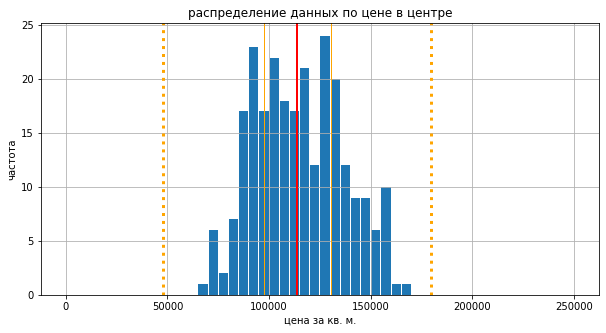

In [156]:
# создание гистограммы распределния по цене за кв. м. квартиры. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr.
iqr = (df_snt_ptrg_centr['price_sqr_m'].quantile(0.75) - df_snt_ptrg_centr['price_sqr_m'].quantile(0.25))
df_snt_ptrg_centr.hist('price_sqr_m' , bins=50, rwidth=0.9 , range=(0 , 250000) , figsize=(10 , 5))
plt.title('распределение данных по цене в центре')
plt.xlabel('цена за кв. м.')
plt.ylabel('частота')
plt.axvline( x=df_snt_ptrg_centr['price_sqr_m'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df_snt_ptrg_centr['price_sqr_m'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df_snt_ptrg_centr['price_sqr_m'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df_snt_ptrg_centr['price_sqr_m'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df_snt_ptrg_centr['price_sqr_m'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

В отличие от общей базы, распределение цен в Санкт-Петербурге смещено вправо к максимальным значениям. Наибольшие группы расположены в диапазоне 80000-120000 р. за кв. м.. Медиана значений приходится на 114000 р., что выше на 20000 р., чем по общей базе. Средняя цена на 20 % выше, чем по общей выборке. 

In [157]:
# описание данных в столбце по цене за кв. м.
df_snt_ptrg_centr['price_sqr_m'].describe()

count      255.00
mean    114638.17
std      21934.70
min      66872.43
25%      97257.87
50%     113848.20
75%     130198.51
max     166666.67
Name: price_sqr_m, dtype: float64

In [158]:
# нахождение медианы распределения по цене за кв. м.
df_snt_ptrg_centr['price_sqr_m'].median()

113848.20239680426

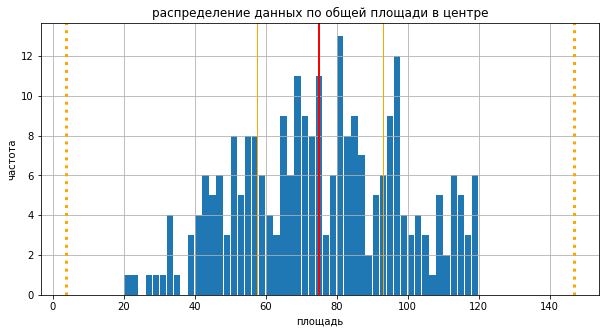

In [159]:
# создание гистограммы распределния по общей площади квартир. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df_snt_ptrg_centr['total_area'].quantile(0.75) - df_snt_ptrg_centr['total_area'].quantile(0.25))
df_snt_ptrg_centr.hist('total_area' , bins=50, rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по общей площади в центре')
plt.xlabel('площадь')
plt.ylabel('частота')
plt.axvline( x=df_snt_ptrg_centr['total_area'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df_snt_ptrg_centr['total_area'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df_snt_ptrg_centr['total_area'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df_snt_ptrg_centr['total_area'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df_snt_ptrg_centr['total_area'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Распределение по площади аналогично общей базе. Только площадь квартир в аналогичных сегметах в сравнении с общей базой больше на 25 %. Это говорит не только о более высокой цене за кв. метр, но и о совершенно иной покупательной способности в центре. Средний покупатель в регионе за квартиру заплатит почти 5 млн. р., а такой же покупатель в центре более чем за 8.5 млн. р.

In [160]:
# описание данных в столбце по площади
df_snt_ptrg_centr['total_area'].describe()

count   255.00
mean     75.23
std      22.94
min      20.00
25%      57.40
50%      75.10
75%      93.15
max     120.00
Name: total_area, dtype: float64

In [161]:
# нахождение медианы распределения по площади
df_snt_ptrg_centr['total_area'].median()

75.1

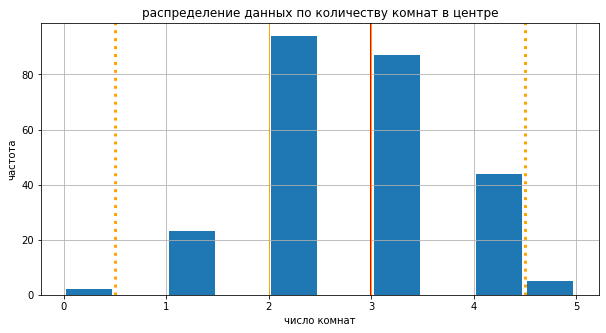

In [162]:
# создание гистограммы распределния по количеству комнат. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df_snt_ptrg_centr['rooms'].quantile(0.75) - df_snt_ptrg_centr['rooms'].quantile(0.25))
df_snt_ptrg_centr.hist('rooms' , bins=10 , rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по количеству комнат в центре')
plt.xlabel('число комнат')
plt.ylabel('частота')
plt.axvline( x=df_snt_ptrg_centr['rooms'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df_snt_ptrg_centr['rooms'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df_snt_ptrg_centr['rooms'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df_snt_ptrg_centr['rooms'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df_snt_ptrg_centr['rooms'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Распределение данных по количеству комнат незначительно стремится вправо к максимальным значениям. В отличии от общей базы средняя и медианная квартира являются 3-х комнатными. Это кореллируется с тем, что и средняя площадь квартир в центре существенно выше, чем во всем городе.

In [163]:
# описание данных в столбце по количеству комнат
df_snt_ptrg_centr['rooms'].describe()

count   255.00
mean      2.64
std       0.96
min       0.00
25%       2.00
50%       3.00
75%       3.00
max       5.00
Name: rooms, dtype: float64

In [164]:
# нахождение медианы распределения по количеству комнат
df_snt_ptrg_centr['rooms'].median()

3.0

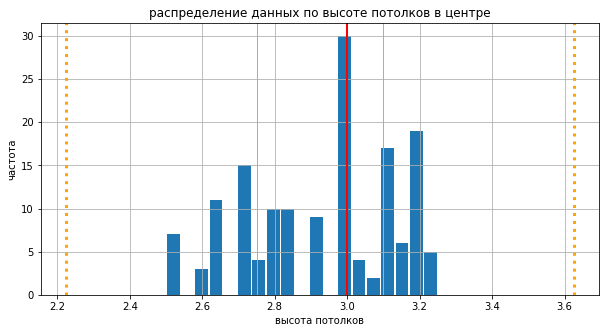

In [165]:
# создание гистограммы распределния по высоте потолков. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr.
iqr = (df_snt_ptrg_centr['ceiling_height'].quantile(0.75) - df_snt_ptrg_centr['ceiling_height'].quantile(0.25))
df_snt_ptrg_centr.hist('ceiling_height' , bins=19 , rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по высоте потолков в центре')
plt.xlabel('высота потолков')
plt.ylabel('частота')
plt.axvline( x=df_snt_ptrg_centr['ceiling_height'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df_snt_ptrg_centr['ceiling_height'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df_snt_ptrg_centr['ceiling_height'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df_snt_ptrg_centr['ceiling_height'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df_snt_ptrg_centr['ceiling_height'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

В отличие от средних показателей по овсей базе, где высота потолков в среднем около 2.7 метра, а также множество квартир находится в диапазоне до 2.5 метров, здесь средние потолки имеют высоту около 3 метров и также немало квартир с большими цифрами. Такое распределение возможно связано с наибольшей концентрацией старинной архитектуры, где при строительстве этаж был выше, чем в настоящее время. 

In [166]:
# описание данных в столбце по высоте потолков
df_snt_ptrg_centr['ceiling_height'].describe()

count   152.00
mean      2.93
std       0.21
min       2.50
25%       2.75
50%       3.00
75%       3.10
max       3.25
Name: ceiling_height, dtype: float64

In [167]:
# нахождение медианы распределения по высоте потолков
df_snt_ptrg_centr['ceiling_height'].median()

3.0

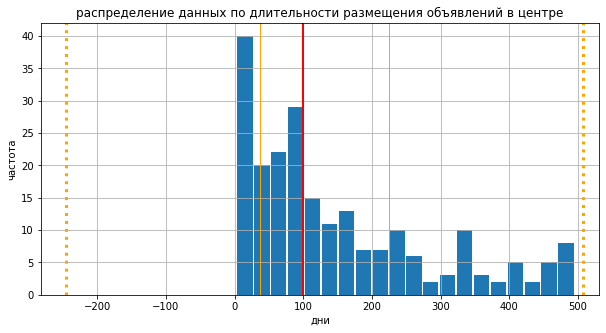

In [168]:
# создание гистограммы распределния по длительности продажи квартир. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr.
iqr = (df_snt_ptrg_centr['days_exposition'].quantile(0.75) - df_snt_ptrg_centr['days_exposition'].quantile(0.25))
df_snt_ptrg_centr.hist('days_exposition' , bins=20 , rwidth=0.9 , figsize=(10 , 5))
plt.title('распределение данных по длительности размещения объявлений в центре')
plt.xlabel('дни')
plt.ylabel('частота')
plt.axvline( x=df_snt_ptrg_centr['days_exposition'].median() , ymin=0 , ymax=8000 , c='red' , lw=2 )
plt.axvline( x=df_snt_ptrg_centr['days_exposition'].quantile(0.25) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline( x=df_snt_ptrg_centr['days_exposition'].quantile(0.75) , ymin=0 , ymax=8000 , c='orange' , lw=1 )
plt.axvline(x=(df_snt_ptrg_centr['days_exposition'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df_snt_ptrg_centr['days_exposition'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

Распределение значений по длительности размещения в центре города имеет, как и вслучае с общей базой нисходящий характер от низких значений в правую сторону к увеличению значений с длинным хвостом. В среднем продажи дольше, чем в общем в регионе примерно на 10 % дольше, чем по всей базе. Это не удивительно, так как квартиры в центре в среднем имеют цену на 70 % выше, чем по общей базе исследования. 

In [169]:
# описание данных в столбце по высоте потолков
df_snt_ptrg_centr['days_exposition'].describe()

count   220.00
mean    149.88
std     135.97
min       3.00
25%      37.00
50%     100.00
75%     225.00
max     495.00
Name: days_exposition, dtype: float64

In [170]:
# нахождение медианы распределения по высоте потолков
df_snt_ptrg_centr['days_exposition'].median()

100.0

Изучим влияние основных параметров на цену квартир в центре Санкт-Петербурга

In [171]:
# декомпозиция датафрейма
df_snt_ptrg_centr_price = df_snt_ptrg_centr[['price_sqr_m' , 'total_area' ,'kitchen_area' , 'rooms' , 'ceiling_height' , 'cityCenters_nearest' , 'weekday_sale' , 'month_sale' , 'year_sale' , 'floor_name' , 'city_centr_km']]

Изучим коэффициенты корреляции.

In [172]:
# таблица с коэффициэнтами корреляции
df_snt_ptrg_centr_price.corr()

,price_sqr_m,total_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest,month_sale,year_sale,city_centr_km
price_sqr_m,1.00,-0.22,0.10,-0.19,0.05,-0.02,0.03,0.24,-0.03
total_area,-0.22,1.00,0.31,0.73,0.07,-0.11,-0.03,-0.12,-0.09
kitchen_area,0.10,0.31,1.00,0.01,0.14,-0.05,0.03,0.03,-0.04
rooms,-0.19,0.73,0.01,1.00,0.07,-0.11,-0.10,-0.05,-0.10
ceiling_height,0.05,0.07,0.14,0.07,1.00,0.03,-0.11,0.13,0.03
cityCenters_nearest,-0.02,-0.11,-0.05,-0.11,0.03,1.00,-0.07,0.04,0.92
month_sale,0.03,-0.03,0.03,-0.10,-0.11,-0.07,1.00,-0.26,-0.07
year_sale,0.24,-0.12,0.03,-0.05,0.13,0.04,-0.26,1.00,0.04
city_centr_km,-0.03,-0.09,-0.04,-0.10,0.03,0.92,-0.07,0.04,1.00


Из таблицы корреляции видно, что влияние увеличение площади на цену в центре Санкт-Петербурга примерно такое же как и по общей базе, поэтому подробно рассматривать корелляцию этих показателей не будем. Рассмотрим подробнее взаимсовязь других параметров с ценой. 

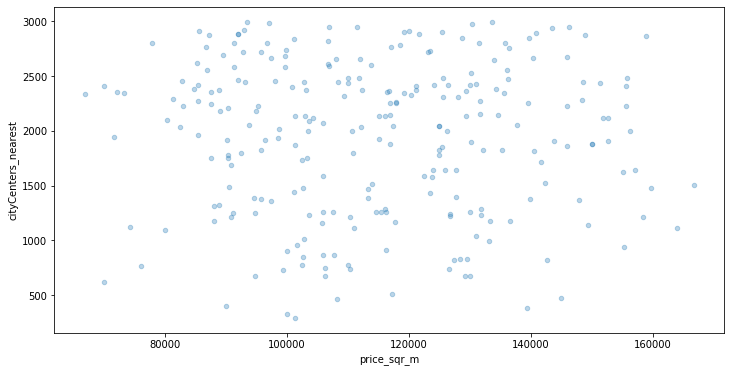

In [173]:
# диаграмма рассеяния зависимости цены от удаленности от центра Санкт-Петербурга
df_snt_ptrg_centr_price.plot(x='price_sqr_m' , y='cityCenters_nearest' , kind='scatter' , alpha=0.3 , figsize=(12 , 6))

В самой центральной зоне Санкт-Петербурга данные по удаленности от центра распределены не равномерно. Ближе к самому центру объявлений существенно меньше, но цена за кв. м. в среднем практически не изменна. Выбросы встречаются по всей удаленности от самой центральной зоны. Далее рассмотрим влияние на цену округленных до 1 км. данных по удаленности от центра, построив хитмэп.

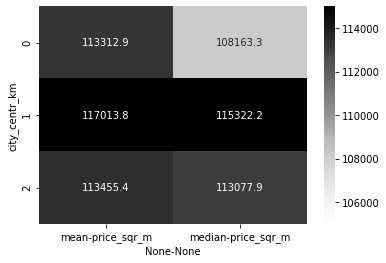

In [174]:
# построение хитмэп, исходя из сведенных данных по удаленности от центра в км. с посчитанной средней и медианной ценой
sns.heatmap(df_snt_ptrg_centr_price.pivot_table(index='city_centr_km' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=105000 , vmax=115000 , cmap='Greys')

Из графика видно, что в среднем при приближении к центру все-таки недвижимость дорожает, разница в цене между окраиной центра и самой центральной частью города достигает более чем 20 %.

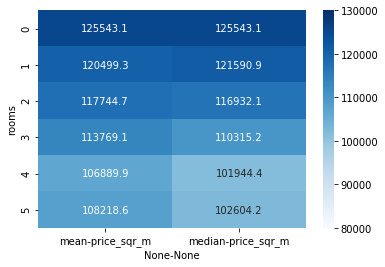

In [175]:
# построение хитмэп, исходя из сведенных данных по количеству комнат с посчитанной средней и медианной ценой
sns.heatmap(df_snt_ptrg_centr_price.pivot_table(index='rooms' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=80000 , vmax=130000 , cmap='Blues')

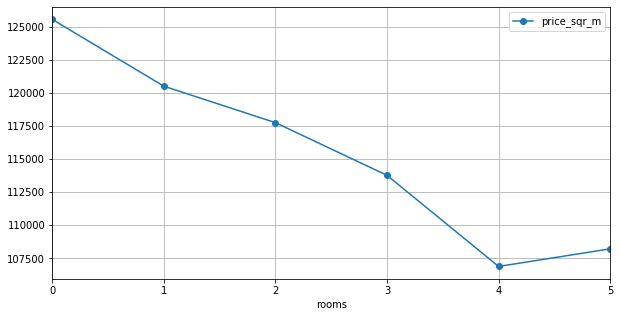

In [176]:
# построение графика зависимости средней цены в центре города от количества комнат
df_snt_ptrg_centr_price.pivot_table(index='rooms' , values='price_sqr_m', 
                                    aggfunc='mean').plot(style='o-', grid=True,  figsize=(10 , 5))

В центре Петербурга в среднем цена за квадратный метр выше всего на квартиры-студии и однокомнатные квартиры, не удивительно, ведь спрос на эти квартиры наибольший, тем более цена за метр в центре "кусается". Ситуация полностью идентична общей базе: чем больше количество комнат, тем ниже цена за квадратный метр. 

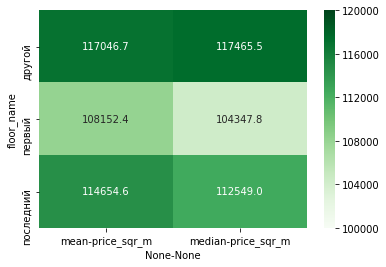

In [177]:
# построение хитмэп, исходя из сведенных данных по этажу квартиры в здании с посчитанной средней и медианной ценой
sns.heatmap(df_snt_ptrg_centr_price.pivot_table(index='floor_name' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=100000 , vmax=120000 , cmap='Greens')

Так же как и по общей базе, наиболее дорогие квартиры находятся в середине дома, затем идут квартиры на последнем этаже(разница между ними в три раза меньше, чем в общей базе). Самыми дешевыми являются квартиры на первом этаже, также как и во всей выборке.

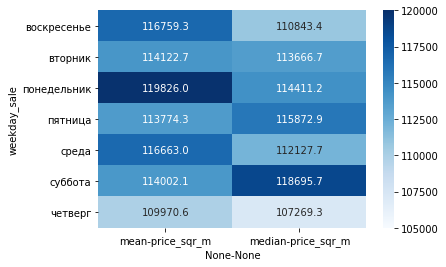

In [178]:
# построение хитмэп, исходя из сведенных данных по дню недели размещения  с посчитанной средней и медианной ценой
sns.heatmap(df_snt_ptrg_centr_price.pivot_table(index='weekday_sale' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=105000 , vmax=120000 , cmap='Blues')

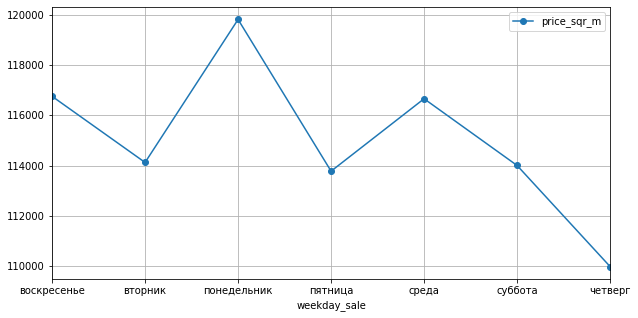

In [179]:
# построение графика зависимости средней цены в центре города от дня недели
df_snt_ptrg_centr_price.pivot_table(index='weekday_sale' , values='price_sqr_m', 
                                    aggfunc='mean').plot(style='o-', grid=True,  figsize=(10 , 5))

Влияние дня размещения объявления на цену несколько отличается от общей базы. Самые дорогие объявления размещались по понедельникам и средам, а также воскресеньям. Ниже всего цена по четвергам, чуть дороже по субботам.  Зависимость размещения в разные дни недели выражена сильнее в центре, чем по общим данным, доходит в среднем до 10 %, на что вероятнее всего влияет небольшая выборка квартир и фактор случайности.

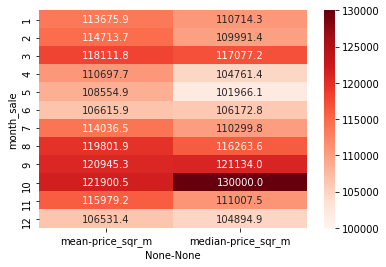

In [180]:
# построение хитмэп, исходя из сведенных данных по месяцу объявления с посчитанной средней и медианной ценой
sns.heatmap(df_snt_ptrg_centr_price.pivot_table(index='month_sale' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=100000 , vmax=130000 , cmap='Reds')

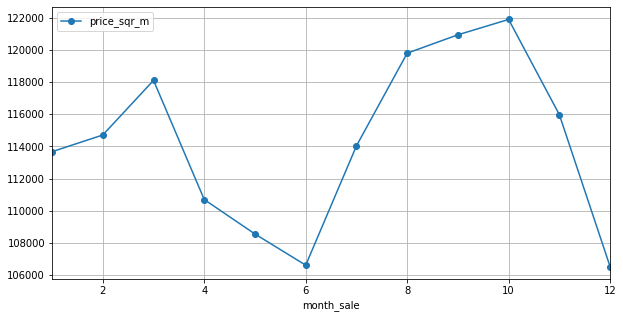

In [181]:
# построение графика зависимости средней цены в центре города от месяца размещения
df_snt_ptrg_centr_price.pivot_table(index='month_sale' , values='price_sqr_m', 
                                    aggfunc='mean').plot(style='o-', grid=True,  figsize=(10 , 5))

 В отличие от всей базы объявлений, сезонность в центре имеет некоторую разницу в ценах. Самые высокие цены в осенние месяцы и в марте, а ниже всего летом и перед новым годом. Видимо, во время отпусков и новогодние праздники люди тратят больше на свой отдых. Разброс цен примерно в 20 %, это можно объяснить небольшим количеством объявлений и наличием дорогих квартир. 

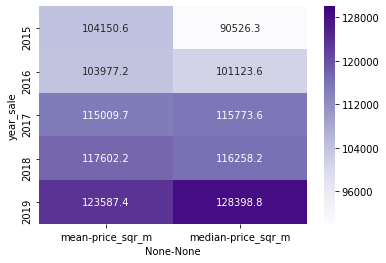

In [182]:
# построение хитмэп, исходя из сведенных данных по году размещения объявления с посчитанной средней и медианной ценой
sns.heatmap(df_snt_ptrg_centr_price.pivot_table(index='year_sale' , values='price_sqr_m', aggfunc=['mean' , 'median']) , 
            annot=True, fmt='.1f' , vmin=90000 , vmax=130000 , cmap='Purples')

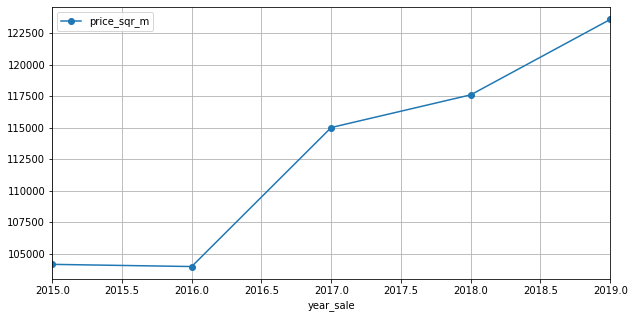

In [183]:
# построение графика зависимости средней цены в центре города от года размещения
df_snt_ptrg_centr_price.pivot_table(index='year_sale' , values='price_sqr_m', 
                                    aggfunc='mean').plot(style='o-', grid=True,  figsize=(10 , 5))

В отличие от общей базы, в базу объявлений в центре не попали объявления, размещенные в 2014 году. Наименьшие показатели зафиксированы в 2015 и 2016 годах, но затем наметился рост в цене (около 15 %), более ощутимый, чем по всей базе. Цены на недвижимость в центре восстанавливались после волны кризиса существенно быстрее, чем в целом по региону.

## Шаг 5.  Итоги исследования.

### Шаг 5.1. Описание хода исследования.

**Целью исследования было установить параметры, влияющие на цену недвижимости в Санкт-Петербурге и его окрестностях. Предварительно была проведена работа с данными.**

- Сделав общий обзор данных методом info() было выяснено, что в данных были пропуски, которые распределены не равномерно по разным столбцам. Пропуски в данных по количеству балконов были заполнены 0-ми методом "fillna". Заполнение данных в столбцах с малой долей пропусков было произведено медианными значениями по столбцам, при это некоторые данные, например как количество этажей в здании было округлено до целых чисел методом "astype". Аномально высокие и низкие данные по высоте потолков были заменены на медианные значения, так как таких значений малое число и это не существенно исказило исследование. Пропуски в данных о площади кухни и жилой площади составили до 10 % от выборки. Далее свели данные по площади кухни и жилой площади в зависимости от количества комнат и написали функцию, которая принимает индексы с пропущенными значениями и список с медианными значениями в зависимости от количества комнат. Результатом работы функции является замена пропущенных значений на медианные по количеству комнат в квартире. Далее заполнили пропуски с населенным пунктом на "неизвестный".Все данные, полученные автоматизированным способом имеют большое количество пропусков, поэтому их не стали брать для дальнейшего анализа. 

- Следующим шагом была проверка данных на дубликаты методом dublicated().sum(). Явных дубликатов не было выявлено. Затем следовало проверить данные на неявные дубликаты. Изучив единственный столбец с текстовыми данными, стало понятно, что одни и те же населенные пункты были записаны по-разному. А именно были записаны только названия, либо с типом населенного пункта, который был записан тоже в нескольких вариантах. Следовало убрать из данных наименования типов населенных пунктов. Для этого создали функцию, результатом работы, которой была замена подстроки с наименованием типа населенного пункта на пустую подстроку(применили методы replace() и str() ). После применения функции и проверки на дубликаты перешли к следующему этапу.

- Подсчитали и добавили основной параметр - цену квадратного метра, влияние других параметров на который изучили в дальнейшем. Преобразовали в формат даты данные в столбце с датой размещения объявления методом "to_datetime". Затем создали столбцы с днем недели, месяцем и годом размещения объявления, применив методы "dt.weekday" , "dt.month" "dt.year". Также рассчитали занесли в таблицу данные с долей площади кухни в общей и долей жилой площади в общей. Далее, для удобства анализа зависимости цены по этажам, разделили в се данные по этажам на 3 основные категории. Для этого использовали функцию, которая возвращает наименование категории этажа. Еще создали функцию, которая принимает номер дня недели, а возвращает наименование дня недели.

- Произвели анализ распределния данных по основным параметрам: общая площадь, площадь кухни, жилая площадь, цена квадратного метра жилья, количество комнат, высота потолков. Для этого построили гистограмму распределения с указанием медианы, межквартильного размаха и линий, идентичных "усам диаграммы размаха".  Также использовали метод describe() для изучения данных. Из дальнейшего исследования иключили параметры площади кухни(распределено аналогично с общей площадью) и жилой площади(распределение имеет неравномерный характер с несколькими пиками, возможно из-за различных методов расчета этой площади). Затем определили выбросы и исключили их из исследования, применив метод drop(). Дальше проанализировали влияние нескольких основных факторов на цену квадратного метра по всей базе исследования. Затем сделали срез методом "query" по данным из 10 самых крупных населенных пунктов и сравнили цены в них.

- Следующим этапом создали столбец, который заполнен сведенными данными со средней ценой на 1 километр удаленности квартиры от центра города. Затем построили график зависимости средней цены от удаленности квартиры от центра по километрам. Из графика нашли километр, с которого примерно начинается центральная часть города(резкий рост графика незадолго до самого центра). Затем проанализировали распределение данных в основных параметрах, влияющих на цену квартиры в центре Санкт-Петербурга, и сравнили с данными по общей базе. Потом выполнили анализ влияния основных параметров на цену в центральной части Санкт-Петербурга и сравнили их с выводами по общей базе.

**На основе исследования можно сделать общий вывод.**

### Шаг 5. 2. Общий вывод.

**Цена квартиры зависит от многих факторов, но мы выделили основные из них:**

 - Данные в центре города Санкт-Петербург и по общей выборке распределены примерно одинаково. Распределение цены выглядит симметрично. Данные по площади и комнатам с небольшим смещением к максимуму. А данные по потолкам не равномерно, но с пиком значений в середине. Причем средние и медианные значения значительно больше(до 30 %) в центральной части города, что может объясняться более старинной архитектурой построек и дорогим классом жилья. При этом средняя квартира может стоить в центре на 70 % дороже, чем по основной базе.
 - Длительность продажи по всей базе составляет в среднем около 100 дней, есть и необычно долгие продажи около 1.5 лет и немного очень быстрых в течение нескольких дней. В центре Санкт-Петербурга жилье продается в среднем на 10 % дольше, чем по всем населенным пунктам.
 - Есть зависимость цены от площади квартиры, с ростом которой, цена вырастает незначительно, а коэффициент корреляции при этом примерно 0,3. При чем по центральной части города площадь на цену влияет еще немного меньше.
 - Удаленность от центра оказывает примерно такое же влияние на рост цены квартиры, чем ближе к центру, тем цена выше. Это касается и вцелом базы данных и центральной части Петербурга. Но в центральной части города такая зависимость лишь немного прослеживается, если изучать данные по каждому километру от центра.
 - Самые дорогие квартиры находятся в Санкт-Петербурге, а самые дешевые в Выборге. Очевидно, в первую очередь удаленность от самого города Санкт-Петербург здесь сказывается в первую очередь. 
 - Дата размещения объявления не имеет какого-то ярко выраженного влияния на цену. Влияние дня недели размещения по общей базе почти не коррелирует с ценой, в центре Петербурга есть небольшой разброс в значениях, но это может быть объяснено относительно небольшой выборкой. По общей базе месяц размещения объявления почти не влияет на цену, но в центральной части различия в сезоне продажи наблюдаются: осень самое время продавать квартиру, а летом и перед Новым годом не стоит торопиться. Возможно это также объясняется незначительным количеством квартир. А вот по году размещения цены на квартиры менялись как по всей базе, так и в центральной примерно одинаково. высокие цены были в 2014 году, затем шел спад и подъем цен в 2019 году, в центре это более заметно.
 - Номер этажа влияет на цену как по всей базе объявлений, так и по центру Петербурга. По общей базе эта зависимость ощутимее, первый этаж самый дешевый, затем последний. Самые высокие цены на этажи в середине дома. Здесь разница в цене между первым и средними этажами может доходить в среднем до 20 %. 
 - Количество комнат в квартире является существенным параметром, влияющим на цену.Чем меньше количество комнат, тем цена квадратного метра выше. Разница в цене в 5-комнатных и квартирах-студиях доходит до 20 % и больше, такая ситуация и в центре и по региону.  
 
**На цену квартир в Санкт-Петербурге и окрестностях наибольшее влияние оказывают приближенность к центру, площадь квартиры, номер этажа и количество комнат. По отдельности значение этих параметров незначительное, но вместе они могут существенно увеличивать или уменьшать цену. Высота потолков корреллирует с ценой в такой же степени как и предыдущие факторы по общим данным, а вот в центре взаимозависимость совсем незаметна, так как основная часть квартир в центре уже имеет достаточно высокие потолки. Надо сказать, что небольшой объем данных может менее объективно описывать реальную картину, чем информация по основной части. Также на взаимосвязь данных в центре может влиять и наличие нестандартных квартир давней застройки, которых там достаточно много.**  
